In [97]:
import pandas as pd # standard python data library
import matplotlib.pyplot as plt # for plotting maps
import geopandas as gp # the geo-version of pandas
import numpy as np
import sys
import os
from statistics import mean, median
from functools import reduce
import glob

# VEST TX 2018
---
## VEST's Documentation

Election results and precinct shapefile from the Texas Legislative Council (https://data.capitol.texas.gov/). The precinct data files available for download at the TXLC Capitol Data Portal are allocated to Census VTD geography based on Voting Age Population from the 2010 Census. The unallocated precinct results and registration statistics were generously provided by TXLC staff to instead merge with the precinct boundaries.

The shapefile includes unallocated Voter Registration (VR) and Spanish Surname Voter Registration (SSVR) for the November 2018 general election. Any VR data analysis of these unallocated precinct results should utilize this unallocated VR data rather than the VR data allocated by VTD available for download at CDP. SSVR is denoted as a percentile of total VR for each precinct.

Precinct results for the following counties were replaced in whole or in part with county source files or with precinct data provided via the Secretary of State: Atascosa, Bexar, Blanco, Borden, Bowie, Brewster, Brown, Carson, Cherokee, Cochran, Comanche, Cooke, Culberson, Duval, Fort Bend, Gillespie, Hartley, Haskell, Hays, Hood, Jefferson, Jim Hogg, Johnson, Lamar, Matagorda, Midland, Nolan, Ochiltree, Robertson, Rockwall, Rusk, Starr, Terrell, Tyler.

Precinct 4/6 in Gonzales was merged prior to 2008. Gonzales 4 was the city of Nixon while Gonzales 6 was the surrounding county precinct. However, they reappear as separate line items in the 2018 general election county report. Since these are otherwise regarded as a unitary precinct and it is unclear that the separate 2018 line items correspond to the obsolete boundaries the results for Gonzales 4/6 were combined in the shapefile.

Precinct totals for the counties listed below do not add up to the Secretary of State County Canvass for one or more offices. Most commonly this is due to omission of some ballots counted after election day from either the county precinct reports or from summary results certified to the state. In some cases these involve data entry errors where numbers were transposed, dropped, or added in one or more precincts or in countywide summations. In some cases corrections to the initial precinct results were made after the certification deadline.

Armstrong, Bailey, Bandera, Baylor, Calhoun, Childress, Cochran, Collingsworth, Cottle, Culberson, Dimmit, Fayette, Galveston, Goliad, Gonzales, Hall, Hartley, Haskell, Hockley, Hudspeth, Jackson, Kent, Live Oak, Loving, McCulloch, Moore, Morris, Motley, Presidio, Reeves, Runnells, San Saba, Somervell, Starr, Stephens, Terrell, Titus, Waller, Ward, Wichita, Willacy, Winkler, Zavala.

Most of the discrepancies are in single digits or low double digits. The exceptions are an 80 vote overreport from Jackson for Ted Cruz (R) for U.S. Senate, a 2000 vote overreport from Galveston for Ken Paxton (R) for Attorney General, a 273 vote underreport from Somervell for Justin Nelson (D) for Attorney General, a 2000 vote underreport from Starr for Jimmy Blacklock (R) for Supreme Court Justice 2, an 8470 vote underreport from Wichita for Steven Kirkland (D) for Supreme Court Justice 2, a 90 vote underreport from Moore for Michelle Slaughter (R) for Criminal Appeals Judge 8, a 10229 vote underreport from Waller for Michelle Slaughter (R) for Criminal Appeals Judge 8, and a 2934 vote underreport from Waller for Mark Ash (L) for Criminal Appeals Judge 8.

Votes reported countywide were distributed by candidate to precincts based on the precinct-level reported vote. This includes all early ballots in Collingsworth, Crockett, Dawson, Hudspeth, Kent, McMullen, and Trinity. Mail ballots in Armstrong. Federal and/or limited ballots in Bexar, Brazos, Hays, Jefferson, and Rockwall. Provisional and military ballots in Bowie.

The following counties reported combined results for some precincts. As these specific precincts align with VTD boundaries the combined results were replaced with the VTD allocated precinct results from the TXLC Capitol Data Portal. Any data corrections or distributions noted above were transferred accordingly.

Bowie: 1A/4E, 1B/2A, 2B/4D/5A, 2D/4A/4C/5B, 13/30, 21/22, 24/25
Dallam: 2/8, 3/5/9
Howard: 11-16/103-105, 24-26/205, 32-35/304, 42-46/404-405, 207-208, 408/409
Kleberg: 33/34
Lamb: 7/8
Lynn: 2/8, 3/10, 4/11
McMullen: 2A/2B, 4A/4B
Newton: 11/13/21
Real: 4/7
Red River: 1/11, 17/18, 27/30
San Saba: 2A/2B, 3A/3B, 4A/4B

* G18VR - Voter registration
* G18SSVR - Spanish surname voter registration


* G18USSRCRU - Ted Cruz (Republican Party)
* G18USSDORO - Beto O'Rourke (Democratic Party)
* G18USSLDIK - Neal M. Dikeman (Libertarian Party)


* G18GOVRABB - Greg Abbott (Republican Party)
* G18GOVDVAL - Lupe Valdez (Democratic Party)
* G18GOVLTIP - Mark Jay Tippetts (Libertarian Party)


* G18LTGRPAT - Dan Patrick (Republican Party)
* G18LTGDCOL - Mike Collier (Democratic Party)
* G18LTGLMCK - Kerry Douglas McKennon (Libertarian Party)


* G18ATGRPAX - Ken Paxton (Republican Party)
* G18ATGDNEL - Justin Nelson (Democratic Party)
* G18ATGLHAR - Michael Ray Harris (Libertarian Party)


* G18COMRHEG - Glenn Hegar (Republican Party)
* G18COMDCHE - Joi Chevalier (Democratic Party)
* G18COMLSAN - Ben Sanders (Libertarian Party)


* G18LANRBUS - George P. Bush (Republican Party)
* G18LANDSUA - Miguel Suazo (Democratic Party)
* G18LANLPIN - Matt Pina (Libertarian Party)


* G18AGRRMIL - Sid Miller (Republican Party)
* G18AGRDOLS - Kim Olson (Democratic Party)
* G18AGRLCAR - Richard Carpenter (Libertarian Party)


* G18RRCRCRA - Christi Craddick (Republican Party)
* G18RRCDMCA - Roman McAllen (Democratic Party)
* G18RRCLWRI - Mike Wright (Libertarian Party)


* G18SSCRBLA - Jimmy Blacklock (Republican Party)
* G18SSCDKIR - Stever Kirkland (Democratic Party)


* G18SSCRDEV - John Devine (Republican Party)
* G18SSCDSAN - R.K. Sandill (Democratic Party)


* G18SSCRBRO - Jeff Brown (Republican Party)
* G18SSCDCHE - Kathy Cheng (Democratic Party)


* G18SCCRKEL - Sharon Keller (Republican Party)
* G18SCCDJAC - Maria T. (Terri) Jackson (Democratic Party)
* G18SCCLSTR - William Bryan Strange III (Libertarian Party)


* G18SCCRHER - Barbara Parker Hervey (Republican Party)
* G18SCCDFRA - Romana Franklin (Democratic Party)


* G18SCCRSLA - Michelle Slaughter (Republican Party)
* G18SCCLASH - Mark Ash (Libertarian Party)


## Election Result Processing

### Get VEST file and FIPS dictionary ready

#### Load in VEST File

In [98]:
vest_shp = gp.read_file("./raw-from-source/VEST/tx_2018/tx_2018.shp")

In [99]:
vest_shp.shape

(8936, 45)

In [100]:
vest_shp.head(10)

,CNTY,COLOR,PREC,PCTKEY,CNTYKEY,G18VR,G18SSVR,G18USSRCRU,G18USSDORO,G18USSLDIK,...,G18SSCRBRO,G18SSCDCHE,G18SCCRKEL,G18SCCDJAC,G18SCCLSTR,G18SCCRHER,G18SCCDFRA,G18SCCRSLA,G18SCCLASH,geometry
0,113,1,1104,1131104,57,2673,36.7,106,924,5,...,116,897,112,889,17,118,897,157,292,"POLYGON ((1314208.406 1178220.110, 1314211.847..."
1,201,5,0312,2010312,101,3985,11.5,926,1096,12,...,1014,1009,947,1045,28,1021,993,1082,372,"POLYGON ((1432565.993 851290.217, 1432575.099 ..."
2,351,1,0003,3510003,176,634,1.6,325,31,3,...,324,27,315,29,9,324,27,324,20,"POLYGON ((1602738.373 1008175.555, 1602745.401..."
3,181,5,0304,1810304,91,3001,4.3,1034,574,22,...,1085,513,1044,519,36,1074,519,1116,243,"POLYGON ((1312523.436 1279889.507, 1312544.741..."
4,201,2,0877,2010877,101,4541,25.5,702,1550,16,...,723,1529,715,1507,38,734,1521,856,528,"POLYGON ((1409146.792 864246.161, 1409155.944 ..."
5,439,2,4370,4394370,220,0,0.0,0,0,0,...,0,0,0,0,0,0,0,0,0,"POLYGON ((1250192.630 1176171.141, 1250192.376..."
6,309,5,0088,3090088,155,655,20.8,100,90,0,...,100,90,101,85,5,102,88,104,32,"POLYGON ((1272987.014 1051905.284, 1273005.943..."
7,29,6,4106,294106,15,600,45.8,44,118,2,...,47,115,47,112,3,48,113,66,46,"POLYGON ((1156695.520 814878.850, 1156722.504 ..."
8,61,4,0074,610074,31,4575,90.5,368,985,11,...,367,936,331,944,41,357,953,501,509,"POLYGON ((1256312.902 428914.144, 1256470.657 ..."
9,113,6,2713,1132713,57,1744,7.3,791,432,10,...,813,398,796,391,22,812,392,837,187,"POLYGON ((1318245.361 1196060.940, 1318397.661..."


In [101]:
vest_shp.crs

<Projected CRS: PROJCS["NAD_1983_Lambert_Conformal_Conic",GEOGCS[" ...>
Name: NAD_1983_Lambert_Conformal_Conic
Axis Info [cartesian]:
- [east]: Easting (metre)
- [north]: Northing (metre)
Area of Use:
- undefined
Coordinate Operation:
- name: unnamed
- method: Lambert Conic Conformal (2SP)
Datum: North American Datum 1983
- Ellipsoid: GRS 1980
- Prime Meridian: Greenwich

<AxesSubplot:>

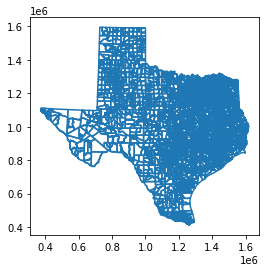

In [102]:
vest_shp.boundary.plot()

In [103]:
vest_shp.columns

Index(['CNTY', 'COLOR', 'PREC', 'PCTKEY', 'CNTYKEY', 'G18VR', 'G18SSVR',
       'G18USSRCRU', 'G18USSDORO', 'G18USSLDIK', 'G18GOVRABB', 'G18GOVDVAL',
       'G18GOVLTIP', 'G18LTGRPAT', 'G18LTGDCOL', 'G18LTGLMCK', 'G18ATGRPAX',
       'G18ATGDNEL', 'G18ATGLHAR', 'G18COMRHEG', 'G18COMDCHE', 'G18COMLSAN',
       'G18LANRBUS', 'G18LANDSUA', 'G18LANLPIN', 'G18AGRRMIL', 'G18AGRDOLS',
       'G18AGRLCAR', 'G18RRCRCRA', 'G18RRCDMCA', 'G18RRCLWRI', 'G18SSCRBLA',
       'G18SSCDKIR', 'G18SSCRDEV', 'G18SSCDSAN', 'G18SSCRBRO', 'G18SSCDCHE',
       'G18SCCRKEL', 'G18SCCDJAC', 'G18SCCLSTR', 'G18SCCRHER', 'G18SCCDFRA',
       'G18SCCRSLA', 'G18SCCLASH', 'geometry'],
      dtype='object')

In [104]:
vest_shp = vest_shp.sort_values(['CNTYKEY','PCTKEY'])

In [105]:
vest_shp

,CNTY,COLOR,PREC,PCTKEY,CNTYKEY,G18VR,G18SSVR,G18USSRCRU,G18USSDORO,G18USSLDIK,...,G18SSCRBRO,G18SSCDCHE,G18SCCRKEL,G18SCCDJAC,G18SCCLSTR,G18SCCRHER,G18SCCDFRA,G18SCCRSLA,G18SCCLASH,geometry
6840,1,7,0001,10001,1,1802,8.0,659,261,6,...,669,239,651,237,19,670,237,689,143,"POLYGON ((1413960.808 1073012.816, 1413971.571..."
3861,1,2,0002,10002,1,2512,3.5,1062,168,7,...,1064,155,1052,160,11,1066,156,1063,84,"POLYGON ((1420165.429 1066385.798, 1420251.968..."
6839,1,4,0003,10003,1,1195,4.3,571,99,4,...,564,91,558,96,6,567,93,572,53,"POLYGON ((1416275.023 1072178.732, 1416410.201..."
3863,1,5,0004,10004,1,1567,2.6,752,97,3,...,737,94,733,93,11,739,98,749,48,"POLYGON ((1435604.819 1074650.256, 1435674.876..."
6843,1,2,0005,10005,1,296,2.4,179,11,1,...,177,12,175,13,3,179,11,181,8,"POLYGON ((1436888.342 1072498.734, 1436911.364..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2875,507,3,0002,5070002,254,2066,91.7,131,666,4,...,135,627,119,633,10,125,631,172,131,"POLYGON ((1017772.875 725002.847, 1017764.094 ..."
2876,507,2,0003,5070003,254,2278,92.6,79,637,7,...,83,604,75,602,11,84,600,120,136,"POLYGON ((1017772.875 725002.847, 1017831.608 ..."
2874,507,6,0004,5070004,254,1317,81.1,191,365,4,...,175,329,171,327,12,176,330,197,90,"POLYGON ((1006753.726 769994.804, 1006799.125 ..."
2872,507,4,001A,507001A,254,943,87.3,61,268,0,...,52,261,49,260,4,57,257,76,58,"POLYGON ((1036482.398 735693.102, 1036617.421 ..."


In [106]:
vest_shp['CNTY'] = vest_shp['CNTY'].astype(str).str.zfill(3)
vest_shp

,CNTY,COLOR,PREC,PCTKEY,CNTYKEY,G18VR,G18SSVR,G18USSRCRU,G18USSDORO,G18USSLDIK,...,G18SSCRBRO,G18SSCDCHE,G18SCCRKEL,G18SCCDJAC,G18SCCLSTR,G18SCCRHER,G18SCCDFRA,G18SCCRSLA,G18SCCLASH,geometry
6840,001,7,0001,10001,1,1802,8.0,659,261,6,...,669,239,651,237,19,670,237,689,143,"POLYGON ((1413960.808 1073012.816, 1413971.571..."
3861,001,2,0002,10002,1,2512,3.5,1062,168,7,...,1064,155,1052,160,11,1066,156,1063,84,"POLYGON ((1420165.429 1066385.798, 1420251.968..."
6839,001,4,0003,10003,1,1195,4.3,571,99,4,...,564,91,558,96,6,567,93,572,53,"POLYGON ((1416275.023 1072178.732, 1416410.201..."
3863,001,5,0004,10004,1,1567,2.6,752,97,3,...,737,94,733,93,11,739,98,749,48,"POLYGON ((1435604.819 1074650.256, 1435674.876..."
6843,001,2,0005,10005,1,296,2.4,179,11,1,...,177,12,175,13,3,179,11,181,8,"POLYGON ((1436888.342 1072498.734, 1436911.364..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2875,507,3,0002,5070002,254,2066,91.7,131,666,4,...,135,627,119,633,10,125,631,172,131,"POLYGON ((1017772.875 725002.847, 1017764.094 ..."
2876,507,2,0003,5070003,254,2278,92.6,79,637,7,...,83,604,75,602,11,84,600,120,136,"POLYGON ((1017772.875 725002.847, 1017831.608 ..."
2874,507,6,0004,5070004,254,1317,81.1,191,365,4,...,175,329,171,327,12,176,330,197,90,"POLYGON ((1006753.726 769994.804, 1006799.125 ..."
2872,507,4,001A,507001A,254,943,87.3,61,268,0,...,52,261,49,260,4,57,257,76,58,"POLYGON ((1036482.398 735693.102, 1036617.421 ..."


In [146]:
vest_shp.reset_index(drop=True,inplace=True)

#### Create a FIPS dictionary

In [107]:
#Load in the nationwide FIPS file
fips_file = pd.read_csv("./raw-from-source/FIPS/US_FIPS_Codes.csv")
fips_file = fips_file[fips_file["State"]=="Texas"]
fips_file["FIPS County"]=fips_file["FIPS County"].astype(str)

#Make the FIPS three digits
fips_file["FIPS County"]=fips_file["FIPS County"].str.zfill(3)

#Create the dictionary
tx_fips_dict = dict(zip(fips_file["County Name"],fips_file["FIPS County"]))

In [108]:
tx_fips_dict

{'Anderson': '001',
 'Andrews': '003',
 'Angelina': '005',
 'Aransas': '007',
 'Archer': '009',
 'Armstrong': '011',
 'Atascosa': '013',
 'Austin': '015',
 'Bailey': '017',
 'Bandera': '019',
 'Bastrop': '021',
 'Baylor': '023',
 'Bee': '025',
 'Bell': '027',
 'Bexar': '029',
 'Blanco': '031',
 'Borden': '033',
 'Bosque': '035',
 'Bowie': '037',
 'Brazoria': '039',
 'Brazos': '041',
 'Brewster': '043',
 'Briscoe': '045',
 'Brooks': '047',
 'Brown': '049',
 'Burleson': '051',
 'Burnet': '053',
 'Caldwell': '055',
 'Calhoun': '057',
 'Callahan': '059',
 'Cameron': '061',
 'Camp': '063',
 'Carson': '065',
 'Cass': '067',
 'Castro': '069',
 'Chambers': '071',
 'Cherokee': '073',
 'Childress': '075',
 'Clay': '077',
 'Cochran': '079',
 'Coke': '081',
 'Coleman': '083',
 'Collin': '085',
 'Collingsworth': '087',
 'Colorado': '089',
 'Comal': '091',
 'Comanche': '093',
 'Concho': '095',
 'Cooke': '097',
 'Coryell': '099',
 'Cottle': '101',
 'Crane': '103',
 'Crockett': '105',
 'Crosby': '107'

### Load, Pivot, Clean Election Results

The SOS directed to this link for election results for the 2016 general: https://data.capitol.texas.gov/

In [109]:
interesting_files = glob.glob("./raw-from-source/Election_Results/*.csv") 
df = pd.concat((pd.read_csv(f, header = 0) for f in interesting_files), axis = 1)

tx_18 = df.loc[:,~df.columns.duplicated()]
tx_18.to_csv("output.csv")

In [110]:
tx_18.columns

Index(['CNTYVTD', 'VTDKEY', 'MillerR_18G_Ag Comm', 'OlsonD_18G_Ag Comm',
       'CarpenterL_18G_Ag Comm', 'PaxtonR_18G_Attorney Gen',
       'NelsonD_18G_Attorney Gen', 'HarrisL_18G_Attorney Gen',
       'HerveyR_18G_CCA 7', 'FranklinD_18G_CCA 7', 'SlaughterR_18G_CCA 8',
       'AshL_18G_CCA 8', 'KellerR_18G_CCA Pres Judge',
       'StrangeL_18G_CCA Pres Judge', 'JacksonD_18G_CCA Pres Judge',
       'HegarR_18G_Comptroller', 'ChevalierD_18G_Comptroller',
       'SandersL_18G_Comptroller', 'AbbottR_18G_Governor',
       'ValdezD_18G_Governor', 'TippettsL_18G_Governor', 'BushR_18G_Land Comm',
       'SuazoD_18G_Land Comm', 'PinaL_18G_Land Comm',
       'PatrickR_18G_Lt. Governor', 'CollierD_18G_Lt. Governor',
       'McKennonL_18G_Lt. Governor', 'CraddickR_18G_RR Comm 1',
       'McAllenD_18G_RR Comm 1', 'WrightL_18G_RR Comm 1',
       'BlacklockR_18G_Sup Ct 2', 'KirklandD_18G_Sup Ct 2',
       'DevineR_18G_Sup Ct 4', 'SandillD_18G_Sup Ct 4', 'BrownR_18G_Sup Ct 6',
       'ChengD_18G_Sup

In [111]:
# Rename the columns to match VEST
tx_18 = tx_18.rename(columns = {'MillerR_18G_Ag Comm':'G18AGRRMIL', 
                                 'OlsonD_18G_Ag Comm':'G18AGRDOLS',
                                 'CarpenterL_18G_Ag Comm':'G18AGRLCAR', 
                                 'PaxtonR_18G_Attorney Gen':'G18ATGRPAX',
                                 'NelsonD_18G_Attorney Gen':'G18ATGDNEL', 
                                 'HarrisL_18G_Attorney Gen':'G18ATGLHAR',
                                 'HerveyR_18G_CCA 7':'G18SCCRHER', 
                                 'FranklinD_18G_CCA 7':'G18SCCDFRA', 
                                 'SlaughterR_18G_CCA 8':'G18SCCRSLA',
                                 'AshL_18G_CCA 8':'G18SCCLASH', 
                                 'KellerR_18G_CCA Pres Judge':'G18SCCRKEL',
                                 'StrangeL_18G_CCA Pres Judge':'G18SCCLSTR', 
                                 'JacksonD_18G_CCA Pres Judge':'G18SCCDJAC',
                                 'HegarR_18G_Comptroller':'G18COMRHEG', 
                                 'ChevalierD_18G_Comptroller':'G18COMDCHE',
                                 'SandersL_18G_Comptroller':'G18COMLSAN', 
                                 'AbbottR_18G_Governor':'G18GOVRABB',
                                 'ValdezD_18G_Governor':'G18GOVDVAL', 
                                 'TippettsL_18G_Governor':'G18GOVLTIP', 
                                 'BushR_18G_Land Comm':'G18LANRBUS',
                                 'SuazoD_18G_Land Comm':'G18LANDSUA', 
                                 'PinaL_18G_Land Comm':'G18LANLPIN',
                                 'PatrickR_18G_Lt. Governor':'G18LTGRPAT', 
                                 'CollierD_18G_Lt. Governor':'G18LTGDCOL',
                                 'McKennonL_18G_Lt. Governor':'G18LTGLMCK', 
                                 'CraddickR_18G_RR Comm 1':'G18RRCRCRA',
                                 'McAllenD_18G_RR Comm 1':'G18RRCDMCA', 
                                 'WrightL_18G_RR Comm 1':'G18RRCLWRI',
                                 'BlacklockR_18G_Sup Ct 2':'G18SSCRBLA', 
                                 'KirklandD_18G_Sup Ct 2':'G18SSCDKIR',
                                 'DevineR_18G_Sup Ct 4':'G18SSCRDEV', 
                                 'SandillD_18G_Sup Ct 4':'G18SSCDSAN', 
                                 'BrownR_18G_Sup Ct 6':'G18SSCRBRO',
                                 'ChengD_18G_Sup Ct 6':'G18SSCDCHE', 
                                 'CruzR_18G_U.S. Sen':'G18USSRCRU', 
                                 "O'RourkeD_18G_U.S. Sen":'G18USSDORO',
                                 'DikemanL_18G_U.S. Sen':'G18USSLDIK'})
# Reorder the columns to match VEST
tx_18 = tx_18[['CNTYVTD', 'VTDKEY',
       'G18USSRCRU', 'G18USSDORO', 'G18USSLDIK', 'G18GOVRABB', 'G18GOVDVAL',
       'G18GOVLTIP', 'G18LTGRPAT', 'G18LTGDCOL', 'G18LTGLMCK', 'G18ATGRPAX',
       'G18ATGDNEL', 'G18ATGLHAR', 'G18COMRHEG', 'G18COMDCHE', 'G18COMLSAN',
       'G18LANRBUS', 'G18LANDSUA', 'G18LANLPIN', 'G18AGRRMIL', 'G18AGRDOLS',
       'G18AGRLCAR', 'G18RRCRCRA', 'G18RRCDMCA', 'G18RRCLWRI', 'G18SSCRBLA',
       'G18SSCDKIR', 'G18SSCRDEV', 'G18SSCDSAN', 'G18SSCRBRO', 'G18SSCDCHE',
       'G18SCCRKEL', 'G18SCCDJAC', 'G18SCCLSTR', 'G18SCCRHER', 'G18SCCDFRA',
       'G18SCCRSLA', 'G18SCCLASH']]

In [112]:
tx_18

,CNTYVTD,VTDKEY,G18USSRCRU,G18USSDORO,G18USSLDIK,G18GOVRABB,G18GOVDVAL,G18GOVLTIP,G18LTGRPAT,G18LTGDCOL,...,G18SSCDSAN,G18SSCRBRO,G18SSCDCHE,G18SCCRKEL,G18SCCDJAC,G18SCCLSTR,G18SCCRHER,G18SCCDFRA,G18SCCRSLA,G18SCCLASH
0,0010001,1,659,261,6,699,214,11,634,260,...,235,669,239,651,237,19,670,237,689,143
1,0010002,2,1062,168,7,1090,134,13,1052,163,...,156,1064,155,1052,160,11,1066,156,1063,84
2,0010003,3,571,99,4,593,80,2,563,100,...,98,564,91,558,96,6,567,93,572,53
3,0010004,4,752,97,3,767,77,9,732,103,...,93,737,94,733,93,11,739,98,749,48
4,0010005,5,179,11,1,182,8,1,176,12,...,12,177,12,175,13,3,179,11,181,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9152,5070002,9153,131,666,4,179,598,7,141,613,...,619,135,627,119,633,10,125,631,172,131
9153,5070003,9154,79,637,7,120,580,5,88,595,...,590,83,604,75,602,11,84,600,120,136
9154,5070004,9155,191,365,4,222,320,2,187,324,...,321,175,329,171,327,12,176,330,197,90
9155,507001A,9156,61,268,0,76,248,1,59,254,...,255,52,261,49,260,4,57,257,76,58


In [113]:
tx_18['CNTY'] = tx_18['CNTYVTD'].str[:3]

In [114]:
# tx_18['VTD'] = tx_18['CNTYVTD'].str[3:]

In [115]:
tx_18['PCTKEY'] = tx_18['CNTYVTD']

In [116]:
tx_18

,CNTYVTD,VTDKEY,G18USSRCRU,G18USSDORO,G18USSLDIK,G18GOVRABB,G18GOVDVAL,G18GOVLTIP,G18LTGRPAT,G18LTGDCOL,...,G18SSCDCHE,G18SCCRKEL,G18SCCDJAC,G18SCCLSTR,G18SCCRHER,G18SCCDFRA,G18SCCRSLA,G18SCCLASH,CNTY,PCTKEY
0,0010001,1,659,261,6,699,214,11,634,260,...,239,651,237,19,670,237,689,143,001,0010001
1,0010002,2,1062,168,7,1090,134,13,1052,163,...,155,1052,160,11,1066,156,1063,84,001,0010002
2,0010003,3,571,99,4,593,80,2,563,100,...,91,558,96,6,567,93,572,53,001,0010003
3,0010004,4,752,97,3,767,77,9,732,103,...,94,733,93,11,739,98,749,48,001,0010004
4,0010005,5,179,11,1,182,8,1,176,12,...,12,175,13,3,179,11,181,8,001,0010005
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9152,5070002,9153,131,666,4,179,598,7,141,613,...,627,119,633,10,125,631,172,131,507,5070002
9153,5070003,9154,79,637,7,120,580,5,88,595,...,604,75,602,11,84,600,120,136,507,5070003
9154,5070004,9155,191,365,4,222,320,2,187,324,...,329,171,327,12,176,330,197,90,507,5070004
9155,507001A,9156,61,268,0,76,248,1,59,254,...,261,49,260,4,57,257,76,58,507,507001A


# Validating Election Results

## Statewide Candidate Totals

In [118]:
data_columns = ['G18USSRCRU', 'G18USSDORO', 'G18USSLDIK', 'G18GOVRABB', 'G18GOVDVAL',
       'G18GOVLTIP', 'G18LTGRPAT', 'G18LTGDCOL', 'G18LTGLMCK', 'G18ATGRPAX',
       'G18ATGDNEL', 'G18ATGLHAR', 'G18COMRHEG', 'G18COMDCHE', 'G18COMLSAN',
       'G18LANRBUS', 'G18LANDSUA', 'G18LANLPIN', 'G18AGRRMIL', 'G18AGRDOLS',
       'G18AGRLCAR', 'G18RRCRCRA', 'G18RRCDMCA', 'G18RRCLWRI', 'G18SSCRBLA',
       'G18SSCDKIR', 'G18SSCRDEV', 'G18SSCDSAN', 'G18SSCRBRO', 'G18SSCDCHE',
       'G18SCCRKEL', 'G18SCCDJAC', 'G18SCCLSTR', 'G18SCCRHER', 'G18SCCDFRA',
       'G18SCCRSLA', 'G18SCCLASH']
def statewide_totals_check(partner_df,source_df,column_list):
    print("***Statewide Totals Check***")
    for race in column_list:
        if (sum(partner_df[race])- source_df[race].sum() != 0):
            print(race+" has a difference of "+str(sum(partner_df[race])-source_df[race].sum())+" votes")
            print("\tVEST: "+str(sum(partner_df[race]))+" votes")
            print("\tSOURCES: "+str(source_df[race].sum())+" votes")
        else:
            print(race + " is equal", "\tVEST / RDH: " + str(sum(partner_df[race])))

In [119]:
statewide_totals_check(vest_shp,tx_18,data_columns)

***Statewide Totals Check***
G18USSRCRU has a difference of 832 votes
	VEST: 4260462 votes
	SOURCES: 4259630 votes
G18USSDORO has a difference of 1547 votes
	VEST: 4045620 votes
	SOURCES: 4044073 votes
G18USSLDIK has a difference of 11 votes
	VEST: 65483 votes
	SOURCES: 65472 votes
G18GOVRABB has a difference of 867 votes
	VEST: 4656211 votes
	SOURCES: 4655344 votes
G18GOVDVAL has a difference of 924 votes
	VEST: 3546597 votes
	SOURCES: 3545673 votes
G18GOVLTIP has a difference of 36 votes
	VEST: 140632 votes
	SOURCES: 140596 votes
G18LTGRPAT has a difference of 799 votes
	VEST: 4260985 votes
	SOURCES: 4260186 votes
G18LTGDCOL has a difference of 964 votes
	VEST: 3860842 votes
	SOURCES: 3859878 votes
G18LTGLMCK has a difference of 60 votes
	VEST: 183515 votes
	SOURCES: 183455 votes
G18ATGRPAX has a difference of 789 votes
	VEST: 4191244 votes
	SOURCES: 4190455 votes
G18ATGDNEL has a difference of 976 votes
	VEST: 3898385 votes
	SOURCES: 3897409 votes
G18ATGLHAR has a difference of 59 v

## County Totals

In [120]:
# Check the number of counties - looking for 254
print(len(tx_18["CNTY"].unique()))
print(len(vest_shp["CNTY"].unique()))

254
254


In [121]:
def county_totals_check(partner_df,source_df,column_list,county_col,full_print=False):
    print("***Countywide Totals Check***")
    print("")
    diff_counties=[]
    for race in column_list:
        diff = partner_df.groupby([county_col]).sum()[race]-source_df.groupby([county_col]).sum()[race]
        for val in diff[diff != 0].index.values.tolist():
            if val not in diff_counties:
                diff_counties.append(val)
        if len(diff[diff != 0]!=0):   
            print(race + " contains differences in these counties:")
            for val in diff[diff != 0].index.values.tolist():
                county_differences = diff[diff != 0]
                print("\t"+str(val)+" has a difference of "+str(county_differences[val])+" votes")
                print("\t\tVEST: "+str(partner_df.groupby([county_col]).sum().loc[val,race])+" votes")
                print("\t\tSOURCES: "+str(source_df.groupby([county_col]).sum().loc[val,race])+" votes")
            if (full_print):
                for val in diff[diff == 0].index.values.tolist():
                    county_similarities = diff[diff == 0]
                    print("\t"+val + ": "+ str(partner_df.groupby([county_col]).sum().loc[val,race])+" votes")
        else:
            print(race + " is equal across all counties")
            if (full_print):
                for val in diff[diff == 0].index.values.tolist():
                    county_similarities = diff[diff == 0]
                    print("\t"+val + ": "+ str(partner_df.groupby([county_col]).sum().loc[val,race])+" votes")

In [122]:
county_totals_check(vest_shp,tx_18,data_columns,"CNTY", full_print=False)

***Countywide Totals Check***

G18USSRCRU contains differences in these counties:
	029 has a difference of 396 votes
		VEST: 217600 votes
		SOURCES: 217204 votes
	031 has a difference of 1 votes
		VEST: 4181 votes
		SOURCES: 4180 votes
	037 has a difference of 26 votes
		VEST: 20157 votes
		SOURCES: 20131 votes
	065 has a difference of 7 votes
		VEST: 2192 votes
		SOURCES: 2185 votes
	073 has a difference of 10 votes
		VEST: 11631 votes
		SOURCES: 11621 votes
	093 has a difference of -1 votes
		VEST: 3799 votes
		SOURCES: 3800 votes
	097 has a difference of 11 votes
		VEST: 11879 votes
		SOURCES: 11868 votes
	131 has a difference of 2 votes
		VEST: 1330 votes
		SOURCES: 1328 votes
	185 has a difference of 9 votes
		VEST: 6499 votes
		SOURCES: 6490 votes
	205 has a difference of 16 votes
		VEST: 1467 votes
		SOURCES: 1451 votes
	209 has a difference of 210 votes
		VEST: 33308 votes
		SOURCES: 33098 votes
	245 has a difference of 75 votes
		VEST: 36731 votes
		SOURCES: 36656 votes
	247 h

		VEST: 26372 votes
		SOURCES: 26346 votes
	401 has a difference of 2 votes
		VEST: 11950 votes
		SOURCES: 11948 votes
	427 has a difference of 7 votes
		VEST: 2234 votes
		SOURCES: 2227 votes
	443 has a difference of -1 votes
		VEST: 276 votes
		SOURCES: 277 votes
G18LTGDCOL contains differences in these counties:
	029 has a difference of 502 votes
		VEST: 304686 votes
		SOURCES: 304184 votes
	031 has a difference of 3 votes
		VEST: 1582 votes
		SOURCES: 1579 votes
	037 has a difference of 23 votes
		VEST: 8566 votes
		SOURCES: 8543 votes
	065 has a difference of 2 votes
		VEST: 509 votes
		SOURCES: 507 votes
	073 has a difference of 7 votes
		VEST: 3450 votes
		SOURCES: 3443 votes
	097 has a difference of 4 votes
		VEST: 2601 votes
		SOURCES: 2597 votes
	185 has a difference of 3 votes
		VEST: 2197 votes
		SOURCES: 2194 votes
	205 has a difference of 1 votes
		VEST: 191 votes
		SOURCES: 190 votes
	209 has a difference of 253 votes
		VEST: 42380 votes
		SOURCES: 42127 votes
	245 has a

		VEST: 35691 votes
		SOURCES: 35613 votes
	277 has a difference of 15 votes
		VEST: 3277 votes
		SOURCES: 3262 votes
	321 has a difference of 4 votes
		VEST: 2706 votes
		SOURCES: 2702 votes
	353 has a difference of 1 votes
		VEST: 800 votes
		SOURCES: 799 votes
	397 has a difference of 35 votes
		VEST: 9721 votes
		SOURCES: 9686 votes
	427 has a difference of 24 votes
		VEST: 6941 votes
		SOURCES: 6917 votes
G18COMLSAN contains differences in these counties:
	029 has a difference of 46 votes
		VEST: 21596 votes
		SOURCES: 21550 votes
	037 has a difference of 1 votes
		VEST: 660 votes
		SOURCES: 659 votes
	073 has a difference of 1 votes
		VEST: 306 votes
		SOURCES: 305 votes
	131 has a difference of 1 votes
		VEST: 158 votes
		SOURCES: 157 votes
	185 has a difference of 1 votes
		VEST: 207 votes
		SOURCES: 206 votes
	205 has a difference of 1 votes
		VEST: 33 votes
		SOURCES: 32 votes
	209 has a difference of 38 votes
		VEST: 3874 votes
		SOURCES: 3836 votes
	245 has a difference of 

		VEST: 842 votes
		SOURCES: 840 votes
G18RRCRCRA contains differences in these counties:
	029 has a difference of 358 votes
		VEST: 230166 votes
		SOURCES: 229808 votes
	031 has a difference of 1 votes
		VEST: 4133 votes
		SOURCES: 4132 votes
	037 has a difference of 29 votes
		VEST: 19877 votes
		SOURCES: 19848 votes
	065 has a difference of 6 votes
		VEST: 2140 votes
		SOURCES: 2134 votes
	073 has a difference of 10 votes
		VEST: 11443 votes
		SOURCES: 11433 votes
	093 has a difference of -1 votes
		VEST: 3792 votes
		SOURCES: 3793 votes
	097 has a difference of 10 votes
		VEST: 11853 votes
		SOURCES: 11843 votes
	131 has a difference of 1 votes
		VEST: 950 votes
		SOURCES: 949 votes
	185 has a difference of 9 votes
		VEST: 6475 votes
		SOURCES: 6466 votes
	205 has a difference of 16 votes
		VEST: 1443 votes
		SOURCES: 1427 votes
	209 has a difference of 215 votes
		VEST: 34518 votes
		SOURCES: 34303 votes
	229 has a difference of -1 votes
		VEST: 421 votes
		SOURCES: 422 votes
	245

		SOURCES: 304578 votes
	031 has a difference of 2 votes
		VEST: 1472 votes
		SOURCES: 1470 votes
	037 has a difference of 20 votes
		VEST: 7830 votes
		SOURCES: 7810 votes
	065 has a difference of 2 votes
		VEST: 242 votes
		SOURCES: 240 votes
	073 has a difference of 7 votes
		VEST: 3131 votes
		SOURCES: 3124 votes
	097 has a difference of 5 votes
		VEST: 2299 votes
		SOURCES: 2294 votes
	109 has a difference of 2 votes
		VEST: 415 votes
		SOURCES: 413 votes
	185 has a difference of 3 votes
		VEST: 1975 votes
		SOURCES: 1972 votes
	205 has a difference of 2 votes
		VEST: 139 votes
		SOURCES: 137 votes
	209 has a difference of 247 votes
		VEST: 42061 votes
		SOURCES: 41814 votes
	245 has a difference of 83 votes
		VEST: 36829 votes
		SOURCES: 36746 votes
	277 has a difference of 16 votes
		VEST: 3506 votes
		SOURCES: 3490 votes
	321 has a difference of 5 votes
		VEST: 2973 votes
		SOURCES: 2968 votes
	353 has a difference of 1 votes
		VEST: 876 votes
		SOURCES: 875 votes
	397 has a di

		VEST: 11936 votes
		SOURCES: 11925 votes
	131 has a difference of 1 votes
		VEST: 1022 votes
		SOURCES: 1021 votes
	185 has a difference of 10 votes
		VEST: 6520 votes
		SOURCES: 6510 votes
	205 has a difference of 16 votes
		VEST: 1461 votes
		SOURCES: 1445 votes
	209 has a difference of 218 votes
		VEST: 35615 votes
		SOURCES: 35397 votes
	245 has a difference of 78 votes
		VEST: 36724 votes
		SOURCES: 36646 votes
	247 has a difference of 1 votes
		VEST: 341 votes
		SOURCES: 340 votes
	277 has a difference of 23 votes
		VEST: 12652 votes
		SOURCES: 12629 votes
	321 has a difference of 6 votes
		VEST: 7288 votes
		SOURCES: 7282 votes
	353 has a difference of 3 votes
		VEST: 3098 votes
		SOURCES: 3095 votes
	357 has a difference of 1 votes
		VEST: 2152 votes
		SOURCES: 2151 votes
	395 has a difference of 3 votes
		VEST: 4168 votes
		SOURCES: 4165 votes
	397 has a difference of 32 votes
		VEST: 27840 votes
		SOURCES: 27808 votes
	401 has a difference of 2 votes
		VEST: 12597 votes
		S

In [123]:
print(len(tx_18["CNTYVTD"].unique()))
print(len(vest_shp["PCTKEY"].unique()))

9157
8936


## Precinct Totals

### Join Attempt 1

In [131]:
vest_shp["join_col"] = vest_shp['CNTY']+vest_shp['PREC']
tx_18["join_col"]=tx_18["CNTYVTD"]

In [141]:
empty_precincts = []
for index, row in tx_18.iterrows():
    number_of_zero_vote_races = 0
    for race in data_columns:
        if (row[race]==0):
            number_of_zero_vote_races += 1
    if(number_of_zero_vote_races == len(data_columns)):
        empty_precincts.append(row["join_col"])
print(len(empty_precincts))

352


In [145]:
print(empty_precincts)

['0291030B', '0291064B', '0291090', '0291101', '0291106', '0291114', '0291126', '0291130', '0291131', '0291134', '0291135', '0291137', '0292039B', '0292157', '0292158', '0293024', '0293086B', '0293106B', '0293133', '0293170', '0293177', '0293178', '0293187', '0293188', '0293192', '0293197', '0293199B', '0293200', '0293204', '0293205', '0293206B', '0293206C', '0294007B', '0294007C', '0294007D', '0294007E', '0294103', '0294135', '0294139', '0294140', '0294175', '0294181', '0294187', '0294191', '0294192', '0294195', '0294196', '0294202', '0294208', '037004E', '037005B', '0410032', '0410042', '0410051', '0410064', '0410068', '0410083', '0410087', '0410088', '0410089', '0410090', '0410092', '0410093', '0410094A', '0410094B', '0410094C', '0410095', '0410097', '0410099', '0410100', '0410101B', '0410101C', '0410101D', '0410103', '0550107', '0550112', '0550113', '0550114', '0550115', '0550116', '0550117', '0550307', '0550410', '0550411', '0610108', '0610109', '0710013', '0850013B', '0850184', '

In [150]:
vest_shp = vest_shp[~vest_shp.join_col.isin(empty_precincts)]
tx_18 = tx_18[~tx_18.join_col.isin(empty_precincts)]

In [151]:
join_one = pd.merge(vest_shp,tx_18,how="outer",on="join_col",indicator=True)

In [152]:
join_one["_merge"].value_counts()

both          8535
right_only     270
left_only      160
Name: _merge, dtype: int64

In [154]:
join_one[join_one["_merge"] == "left_only"][['join_col','G18USSRCRU_x', 'G18USSDORO_x', 'G18USSLDIK_x']].to_csv("./vest_only.csv")
join_one[join_one["_merge"] == "right_only"].to_csv("./election_only.csv")

In [ ]:


example = pd.read_csv("./example.csv")
example_dict = dict(zip(example["election_ID"], example["vest_ID"]))
print(example_dict)

election_vest_id_changes_dict ={}
nm_16["join_col"] = nm_16["join_col"].map(election_vest_id_changes_dict).fillna(nm_16["join_col"])

In [ ]:
source_changes_dict = {'Anderson-Clinton Middle': 'Anderson-Clinton Middle School', 'Anderson-Lake City MS': 'Anderson-Lake City Middle School', 'Anderson-Oak Ridge': 'Anderson-Oak Ridge City Hall', 'Bedford-1-1 Wartrace': 'Bedford-101 Wartrace Baptist Church', 'Bedford-1-2 Bell Buckle': 'Bedford-102 Bell Buckle/Webb School', 'Bedford-2-3 Fair Haven': 'Bedford-203 Fairhaven Baptist Church', 'Bedford-3-3 Unionville': 'Bedford-303 Uniounville Fire Hall', 'Bedford-4-3 Bedford': 'Bedford-403 Bedford Community Center', 'Bedford-5-2 Flat Creek': 'Bedford-502 Flat Creek Community Center', 'Bedford-5-5 Normandy': 'Bedford-505 Normandy Baptist Church', 'Bedford-6-1 East Side': 'Bedford-601 East Side School', 'Bedford-7-1 Deery Eakin': 'Bedford-701 Deery Eakin School', 'Bedford-8-1 Thomas': 'Bedford-801 Thomas School', 'Bedford-9-2 Southside': 'Bedford-902 Southside School', 'Benton-1 Holladay': 'Benton-1 Holladay School', 'Benton-4 Camden Elementary': 'Benton-4 Camden Elementary School', 'Benton-5 Library': 'Benton-5 Benton Co. Library', 'Benton-6 Big Sandy': 'Benton-6 Big Sandy School', 'Bledsoe-1-1 Dill': 'Bledsoe-Dill', 'Bledsoe-1-2 Griffith': 'Bledsoe-Griffith', 'Bledsoe-1-3 Mt. Crest': 'Bledsoe-Mt.Crest', 'Bledsoe-2-1 Cold Springs': 'Bledsoe-Cold Springs', 'Bledsoe-2-2 Luminary': 'Bledsoe-Luminary', 'Bledsoe-3-1 Brayton': 'Bledsoe-Brayton', 'Bledsoe-3-2 Rigsby': 'Bledsoe-Rigsby', 'Bledsoe-4-1 Pikeville': 'Bledsoe-Pikeville', 'Bledsoe-5-1 Bellview': 'Bledsoe-Bellview', 'Bledsoe-5-2 Nine Mile': 'Bledsoe-Nine Mile', 'Bledsoe-6-1 Lee Station': 'Bledsoe-Lee Station', 'Bledsoe-6-2 Lusk': 'Bledsoe-Lusk', 'Blount-Alcoa': 'Blount-Alcoa High School', 'Blount-Eagleton MS Cafeteria': 'Blount-Eagleton Cafeteria', 'Blount-Maryville HS': 'Blount-Maryville High School', 'Blount-Maryville Jr High': 'Blount-Maryville Junior High', 'Blount-Oakview': 'Blount-Oak View', 'Blount-William Blount HS': 'Blount-William Blount High', 'Blount-Wm Blount Academy': 'Blount-William Blount Academy', 'Bradley-1-1 McDonald': 'Bradley-101 McDonald Ruritan', 'Bradley-1-2 Prospect': 'Bradley-102 Prospect School', 'Bradley-1-3 Hopewell': 'Bradley-103 Hopewell School', 'Bradley-2-1 E.L. Ross': 'Bradley-201 E.L. Ross School', 'Bradley-2-2 Walker Valley': 'Bradley-202 Walker Valley High', 'Bradley-3-1 Lee University': 'Bradley-301 Lee University', 'Bradley-3-2 Senior Center': 'Bradley-302 Senior Center', 'Bradley-4-1 Oak Grove': 'Bradley-401 Oak Grove School', 'Bradley-4-2 Michigan Ave': 'Bradley-402 Michigan Ave School', 'Bradley-5-1 Blythe/Bower': 'Bradley-501 Blythe/Bower School', 'Bradley-5-2 Museum': 'Bradley-502 5 Points Museum', 'Bradley-6-1 Valley View': 'Bradley-601 Valley View School', 'Bradley-6-2 Blue Springs': 'Bradley-602 Blue Springs School', 'Bradley-6-3 Waterville': 'Bradley-603 Waterville School', 'Bradley-6-4 Black Fox': 'Bradley-604 Black Fox School', 'Bradley-7-1 Stuart': 'Bradley-701 Stuart School', 'Bradley-7-2 Cleveland High': 'Bradley-702 Cleveland High', 'Campbell-1-1 Alder Springs': 'Campbell-Alder Springs', 'Campbell-1-2 Demory': 'Campbell-Demory', 'Campbell-1-3 Pinecrest': 'Campbell-Pinecrest', 'Campbell-1-4 Valley View': 'Campbell-Valley View', 'Campbell-1-5 Well Springs': 'Campbell-Well Springs', 'Campbell-2-1 College Hill': 'Campbell-College Hill', 'Campbell-2-2 East LaFollette': 'Campbell-East LaFollette', 'Campbell-2-3 LaFollette ES': 'Campbell-LaFollette Elementary', 'Campbell-3-1 CCHS': 'Campbell-Campbell County High', 'Campbell-3-2 Jacksboro Sta': 'Campbell-Jacksboro Station', 'Campbell-3-3 West LaFollette': 'Campbell-West LaFollette', 'Campbell-4-1 Caryville': 'Campbell-Caryville', 'Campbell-4-2 Clinchmore': 'Campbell-Clinchmore', 'Campbell-4-3 Jacksboro': 'Campbell-Jacksboro', 'Campbell-4-4 Ridgewood': 'Campbell-Ridgewood', 'Campbell-5-1 Elk Valley': 'Campbell-Elk Valley', 'Campbell-5-2 Habersham': 'Campbell-Habersham', 'Campbell-5-3 Jellico': 'Campbell-Jellico', 'Campbell-5-4 Newcomb': 'Campbell-Newcomb', 'Campbell-5-5 White Oak': 'Campbell-White Oak', 'Cannon-1-1 Westside': 'Cannon-Westside', 'Cannon-2-1 Auburntown': 'Cannon-Auburntown', 'Cannon-2-2 Gassaway': 'Cannon-Gassaway', 'Cannon-2-3 Pleasant Ridge': 'Cannon-Pleasant Ridge', 'Cannon-2-4 Short Mountain': 'Cannon-2 Short Mountain', 'Cannon-3-2 Woodland': 'Cannon-Woodland', 'Cannon-4-1 Eastside': 'Cannon-Eastside', 'Cannon-4-2 Short Mountain': 'Cannon-4 Short Mountain', 'Cannon-5-1 Woodbury': 'Cannon-Woodbury', 'Carroll-Lavinia': 'Carroll-1 Lavinia', 'Carroll-Trezevant': 'Carroll-2 Trezevant', 'Carroll-McLemoresville': 'Carroll-4 McLemoresville', 'Carroll-Cedar Grove': 'Carroll-5 Cedar Grove', 'Carroll-Clarksburg': 'Carroll-6 Clarksburg', 'Carroll-Macedonia': 'Carroll-7 Macedonia', 'Carroll-Civic Center': 'Carroll-8 Civic Center', 'Carroll-Huntingdon': 'Carroll-9 Huntingdon Police Station', 'Carroll-Buena Vista': 'Carroll-11 Buena Vista', 'Carroll-Bruceton': 'Carroll-12 Bruceton', 'Carroll-Hollow Rock': 'Carroll-13 Hollow Rock', 'Carroll-Vale': 'Carroll-14 Vale', 'Carroll-Atwood': 'Carroll-16 Atwood', 'Carroll-Senior Citizens': 'Carroll-17 Senior Citizens', 'Carroll-Cannon': 'Carroll-18 Cannon', 'Carroll-Concord': 'Carroll-19 Concord', 'Carroll-Westport': 'Carroll-20 Westport', 'Carroll-Bethel College': 'Carroll-21 Bethel', 'Carroll-McKenzie': 'Carroll-22 McKenzie City hall', 'Carter-National Guard': 'Carter-National Guard Armory', 'Cheatham-1-1 County Library': 'Cheatham-1-1 Cheatham Co Library', 'Cheatham-2-2 East Cheatham': 'Cheatham-2-1 East Cheatham Elementary', 'Cheatham-3-1 Pleasant View': 'Cheatham-3-1 Pleasant View City Hall', 'Cheatham-4-1 West Cheatham': 'Cheatham-4-1 West Cheatham Elementary', 'Cheatham-4-3 Sycamore': 'Cheatham-4-3 Sycamore Middle School', 'Cheatham-5-1 Greenbrier': 'Cheatham-5-1 Greenbrier Church of Christ', 'Cheatham-5-2 Pegram': 'Cheatham-5-2 Pegram City Hall', 'Cheatham-6-1 Harpeth': 'Cheatham-6-1 Harpeth High School', 'Chester-4-1 West Chester - City': 'Chester-4-1 West Chester City', 'Chester-5-1 East Chester - City': 'Chester-5-1 East Chester City', 'Claiborne-8-2 Vanbebber Sprngs': 'Claiborne-8-2 Vanbebber Springs', 'Clay-1 Dentons Cross Road': 'Clay-1 Dentons Cross Roads', 'Coffee-1 Ada Wright CC': 'Coffee-01 Ada Right Center', 'Coffee-2 St Paul': 'Coffee-02 Saint Paul United Methodist Church', 'Coffee-3 Trinity': 'Coffee-03 Trinity Baptist Church', 'Coffee-4 First Baptist': 'Coffee-04 First Baptist Church', 'Coffee-5 Hillsboro': 'Coffee-05 Hillsboro Community Center', 'Coffee-6 TN Vocational Center': 'Coffee-06 Tennessee Vocational Center', 'Coffee-7 Forest Mill': 'Coffee-07 Forrest Mill Church of Christ Activity Center', 'Coffee-8 New Union': 'Coffee-08 New Union Fire Hall', 'Coffee-9-1 Pocahontas': 'Coffee-9-1 Pocahontas Community Center', 'Coffee-9-2 Summitville': 'Coffee-9-2 Summitville Community Center', 'Coffee-10 Mt. Ararat': 'Coffee-10 Mt. Ararat Baptist Church', 'Coffee-11 Fredonia': 'Coffee-11 Freedonia Community Center', 'Coffee-12 North Coffee': 'Coffee-12 North Coffee Elementary School', "Coffee-13-1 Blanton's Chapel": "Coffee-13-1 Blanton's Chapel Community Center", 'Coffee-13-2 Grace Baptist': 'Coffee-13-2 Grace Baptist Center', 'Coffee-14 Hickerson': 'Coffee-14 Hickerson Fire Hall', 'Coffee-15 Grace Baptist': 'Coffee-15 Grace Baptist Church', "Coffee-16 Lion's Club": 'Coffee-16 Lions Club', 'Coffee-18 First Christian': 'Coffee-18 First Christian Church', 'Coffee-20 Sr Citizens Center': 'Coffee-20 Coffee County Senior Citizens', 'Coffee-21 Wilson Ave': 'Coffee-21 Wilson Avenue Church of Christ', 'Crockett-01': 'Crockett-1', 'Crockett-02': 'Crockett-2', 'Crockett-03': 'Crockett-3', 'Crockett-04': 'Crockett-4', 'Crockett-05': 'Crockett-5', 'Crockett-06': 'Crockett-6', 'Crockett-07': 'Crockett-7', 'Crockett-08': 'Crockett-8', 'Crockett-09': 'Crockett-9', 'Cumberland-1 Cornerstone': 'Cumberland-Cornerstone Baptist Church', 'Cumberland-2 Complex 2': 'Cumberland-Complex 2', 'Cumberland-3 Homestead': 'Cumberland-Homestead', 'Cumberland-3 Dorton': 'Cumberland-Dorton', 'Cumberland-3 Linary': 'Cumberland-Linary', 'Cumberland-3 Big Lick': 'Cumberland-Big Lick', 'Cumberland-4 Tabor': 'Cumberland-Tabor', 'Cumberland-4 Bakers': 'Cumberland-Bakers', 'Cumberland-4 Oak Hill': 'Cumberland-Oak Hill', 'Cumberland-5 Lantana': 'Cumberland-Lantana', 'Cumberland-5 Vandever': 'Cumberland-Vandever', 'Cumberland-5 Tansi': 'Cumberland-Tansi', 'Cumberland-6 Crab Orchard': 'Cumberland-Crab Orchard Town Hall', 'Cumberland-6 Chestnut Hill': 'Cumberland-Chestnut Hill', 'Cumberland-6 Ozone-Pineview': 'Cumberland-Ozone-Pineview', 'Cumberland-6 Grassy Cove': 'Cumberland-Grassy Cove', 'Cumberland-7 Rinnie': 'Cumberland-Rinnie', 'Cumberland-7 Woody': 'Cumberland-Woody', 'Cumberland-7 Mayland': 'Cumberland-Mayland', 'Cumberland-8 Pleasant Hill': 'Cumberland-Pleasant Hill', 'Cumberland-8 Pomona': 'Cumberland-Pomona', 'Cumberland-8 Midway': 'Cumberland-Midway', 'Cumberland-9 Fairfield North': 'Cumberland-Fairfield Glade North', 'Cumberland-9 Fairfield South': 'Cumberland-Fairfield Glade South', 'Dekalb-1-3 Edgar Evins Park': 'Dekalb-1-3 Edgar Evins State Park', 'Dekalb-7-1 Church of Christ': 'Dekalb-7-1 Church of Christ Annex', 'Dickson-1-1': 'Dickson-1-1 Collier House', 'Dickson-1-2': 'Dickson-1-2 Sylvia Baptist Church', 'Dickson-2-1': 'Dickson-2-1 Eno Community Center', 'Dickson-2-2': 'Dickson-2-2 TN City Fire Hall', 'Dickson-3-1': 'Dickson-3-1 Calvary Chapel', 'Dickson-3-2': 'Dickson-3-2 Vanleer Town Hall', 'Dickson-4-1': 'Dickson-4-1 Jackson Chapel', 'Dickson-5-1': 'Dickson-5-1 White Bluff Civic Center', 'Dickson-6-1': 'Dickson-6-1 Burns Church of Christ', 'Dickson-6-2': 'Dickson-6-2 Porter Community Center', 'Dickson-7-1': 'Dickson-7-1 Pomona Baptist Church', 'Dickson-8-1': 'Dickson-8-1 Senior Citizens', 'Dickson-9-1': 'Dickson-9-1 Restoration Church', 'Dickson-10-1': 'Dickson-10-1 First Baptist Church', 'Dickson-11-1': 'Dickson-11-1 Tennsco Community Center', 'Dickson-12-1': 'Dickson-12-1 White Bluff Community Center', 'Dickson-12-2': 'Dickson-12-2 Greater Things Baptist Church', 'Dyer-A1- Bonicord': 'Dyer-A - Bonicord', 'Dyer-A2- Fowlkes': 'Dyer-A - Fowlkes', 'Dyer-B- Newbern': 'Dyer-B - Newbern', 'Dyer-C1- Tatumville': 'Dyer-C - Tatumville', 'Dyer-C2- Trimble': 'Dyer-C - Trimble', 'Dyer-C3- Roellen': 'Dyer-C - Roellen', 'Dyer-D1- Millsfield': 'Dyer-D - Millsfield', 'Dyer-D2- Bogota': 'Dyer-D - Bogota', 'Dyer-E1- Finley': 'Dyer-E - Finley', 'Dyer-E2- Lenox': 'Dyer-E - Lenox', 'Dyer-F- Dyer Co Central': 'Dyer-F - Dyer County Central', 'Dyer-G- Courthouse': 'Dyer-G - Courthouse', 'Dyer-H- E. Dyersburg': 'Dyer-H - E. Dyersburg', 'Dyer-I1- Community Center': 'Dyer-I - Community Center', 'Dyer-I2- Hurricane Hill': 'Dyer-I - Hurricane Hill', 'Dyer-J- North Dyersburg': 'Dyer-J-N Dyersburg', 'Fayette-Somerville City': 'Fayette-1 Somerville', 'Fayette-Fayette Corner': 'Fayette-2 Fayette Corner', 'Fayette-Garnett': 'Fayette-3 Garnett', 'Fayette-Braden': 'Fayette-4 Braden', 'Fayette-Gallaway': 'Fayette-5 Gallaway', 'Fayette-Oakland': 'Fayette-6 Oakland', 'Fayette-Hickory Withe': 'Fayette-7 Hickory Withe', 'Fayette-Elba': 'Fayette-8 Elba', 'Fayette-Piperton': 'Fayette-9 Piperton', 'Fayette-Rossville': 'Fayette-10 Rossville', 'Fayette-Macon': 'Fayette-11 Macon', 'Fayette-Williston': 'Fayette-12 Williston', 'Fayette-Moscow': 'Fayette-13 Moscow', 'Fayette-Parks': 'Fayette-14 Parks', 'Fayette-LaGrange': 'Fayette-15 La Grange', 'Franklin-1-1 Annex': 'Franklin-1-1 FC Annex', 'Franklin-7-2 CG/Winchester Springs': 'Franklin-7-2 Winchester Springs & Center Grove', 'Gibson-1-1 Medina': 'Gibson-01 Medina', 'Gibson-1-2 Sitka': 'Gibson-02 Sitka Community Center', 'Gibson-2 Humboldt Church': 'Gibson-06 Humboldt Ch of Chr', 'Gibson-3 Bailey Park': 'Gibson-07 Humboldt Bailey Park', 'Gibson-4 St James Baptist': 'Gibson-08 St. James Baptist Church', 'Gibson-5 Lane Chapel Church': 'Gibson-09 Humboldt Lane Chapel', 'Gibson-6 Humboldt HS': 'Gibson-10 Humboldt High School', 'Gibson-6-4 Gibson': 'Gibson-04 Gibson', 'Gibson-7-2 Fruitland': 'Gibson-13 Fruitland', 'Gibson-8-1 Edison': 'Gibson-12 Edison', 'Gibson-8-2 Brazil': 'Gibson-14 Brazil', 'Gibson-9 Courthouse': 'Gibson-20 CourtHouse', 'Gibson-10 Agri-Plex': 'Gibson-22 Agri Plex', "Gibson-11-2 Moore's Chapel": "Gibson-24 Moore's Chapel", 'Gibson-11-4 Union Central': 'Gibson-26 Union Central', 'Gibson-11-5 Skullbone': 'Gibson-27 Skullbone', 'Gibson-12 Milan CPC': 'Gibson-28 Milan CPC', 'Gibson-13 Milan Polk Clark': 'Gibson-29 Milan Polk Clark', 'Gibson-14 Milan 1stAssembly': 'Gibson-30 Milan Assembly/God', 'Gibson-15 Milan Municipal': 'Gibson-31 Milan Muni Bldg', 'Gibson-16 Rutherford': 'Gibson-40 Rutherford', 'Gibson-16-1 Yorkville': 'Gibson-17 Yorkville', 'Gibson-16-2 Kenton': 'Gibson-18 Kenton', 'Gibson-17-1 Bradford': 'Gibson-32 Bradford', 'Gibson-18-1 Laneview': 'Gibson-34 Laneview', 'Gibson-18-2 Good Luck': 'Gibson-37 Good Luck', 'Gibson-19-1 Dyer': 'Gibson-38 Dyer', 'Gibson-19-2 Currie': 'Gibson-39 Currie', 'Giles-3A Richland Trace': 'Giles-3A Richland Trace Market', 'Giles-4B Odd Fellows Hall': 'Giles-4B Odds Fellows Hall', 'Giles-5B Agri Park': 'Giles-5B Agri-Park', 'Giles-6A Martin': 'Giles-6A MMC Martin Methodist College', 'Giles-6B Bridgeforth': 'Giles-6B BMS Bridgeforth Middle School', 'Giles-7A GCHS': 'Giles-7A GCHS Giles County High School', 'Giles-7B Rec Center': 'Giles-7B Recreation Center', 'Grainger-1-1': 'Grainger-1-1 Rutledge Middle School', 'Grainger-1-2': 'Grainger-1-2 Old Central Point School', 'Grainger-2-1': 'Grainger-2-1 Bean Station Ele. School', 'Grainger-2-2': 'Grainger-2-2 Grainger High School', 'Grainger-3-1': 'Grainger-3-1 Blaine City Hall', 'Grainger-3-2': 'Grainger-3-2 Indian Ridge Comm. Blg.', 'Grainger-4-1': 'Grainger-4-1 Thorn Hill Comm. Blg.', 'Grainger-4-2': 'Grainger-4-2 Washburn Ele. School', 'Grainger-5-1': 'Grainger-5-1 Bean Station Library', 'Grainger-5-2': 'Grainger-5-2 Senior Citizens Center', 'Greene-1 Baileyton': 'Greene-Baileyton', 'Greene-4 Camp Creek': 'Greene-Camp Creek', 'Greene-2 Chuckey Doak': 'Greene-Chuckey Doak', 'Greene-4 Courthouse': 'Greene-Court House', 'Greene-2 Chuckey': 'Greene-Chuckey', 'Greene-5 Debusk': 'Greene-Debusk', 'Greene-3 Doak': 'Greene-Doak', 'Greene-7 Glenwood': 'Greene-Glenwood', 'Greene-7 High School': 'Greene-High School', 'Greene-6 McDonald': 'Greene-McDonald', 'Greene-6 Mosheim': 'Greene-Mosheim', 'Greene-5 Middle School': 'Greene-Middle School', 'Greene-5 Nolachuckey': 'Greene-Nolachuckey', 'Greene-1 Ottway': 'Greene-Ottway', 'Greene-5 South Greene': 'Greene-South Greene', 'Greene-3 Tusculum View': 'Greene-Tusculum View', 'Greene-1 West Pines': 'Greene-West Pines', 'Grundy-Beersheba Springs': 'Grundy-Beersheba', 'Grundy-Gruetli-Laager': 'Grundy-Gruetli', 'Grundy-Tracy City': 'Grundy-Tracy', 'Hamblen-01-1': 'Hamblen-1-1', 'Hamblen-02-1': 'Hamblen-2-1', 'Hamblen-03-1': 'Hamblen-3-1', 'Hamblen-04-1': 'Hamblen-4-1', 'Hamblen-05-1': 'Hamblen-5-1', 'Hamblen-06-1': 'Hamblen-6-1', 'Hamblen-07-1': 'Hamblen-7-1', 'Hamblen-08-1': 'Hamblen-8-1', 'Hamblen-09-1': 'Hamblen-9-1', 'Hamblen-09-2': 'Hamblen-9-2', 'Hamilton-175 Airport': 'Hamilton-Airport', 'Hamilton-212 Alton Park 1': 'Hamilton-Alton Park 1', 'Hamilton-214 Alton Park 2': 'Hamilton-Alton Park 2', 'Hamilton-003 Amnicola': 'Hamilton-Amnicola', 'Hamilton-050 Apison 1': 'Hamilton-Apison 1', 'Hamilton-118 Apison 2': 'Hamilton-Apison 2', 'Hamilton-216 Apison 3': 'Hamilton-Apison 3', 'Hamilton-004 Avondale': 'Hamilton-Avondale', 'Hamilton-184 Bakewell 1': 'Hamilton-Bakewell 1', 'Hamilton-183 Bakewell 2': 'Hamilton-Bakewell 2', 'Hamilton-051 Birchwood': 'Hamilton-Birchwood', 'Hamilton-005 Bonny Oaks': 'Hamilton-Bonny Oaks', 'Hamilton-006 Brainerd': 'Hamilton-Brainerd', 'Hamilton-007 Brainerd Hills': 'Hamilton-Brainerd Hills', 'Hamilton-008 Bushtown': 'Hamilton-Bushtown', 'Hamilton-052 Collegedale 1': 'Hamilton-Collegedale 1', 'Hamilton-122 Collegedale 2': 'Hamilton-Collegedale 2', 'Hamilton-167 Collegedale 3': 'Hamilton-Collegedale 3', 'Hamilton-204 Collegedale 4': 'Hamilton-Collegedale 4', 'Hamilton-217 Collegedale 5': 'Hamilton-Collegedale 5', 'Hamilton-220 Collegedale 6': 'Hamilton-Collegedale 6', 'Hamilton-012 Concord 1': 'Hamilton-Concord 1', 'Hamilton-093 Concord 2': 'Hamilton-Concord 2', 'Hamilton-141 Concord 3': 'Hamilton-Concord 3', 'Hamilton-181 Concord 4': 'Hamilton-Concord 4', 'Hamilton-177 Concord 5': 'Hamilton-Concord 5', 'Hamilton-178 Concord 6': 'Hamilton-Concord 6', 'Hamilton-206 Concord 7': 'Hamilton-Concord 7', 'Hamilton-208 Courthouse 1': 'Hamilton-Courthouse 1', 'Hamilton-196 Courthouse 2': 'Hamilton-Courthouse 2', 'Hamilton-014 Dalewood': 'Hamilton-Dalewood', 'Hamilton-185 Dallas 1': 'Hamilton-Dallas 1', 'Hamilton-172 Dallas 2': 'Hamilton-Dallas 2', 'Hamilton-199 Downtown 1': 'Hamilton-Downtown 1', 'Hamilton-197 Downtown 2': 'Hamilton-Downtown 2', 'Hamilton-189 DuPont': 'Hamilton-DuPont', 'Hamilton-017 East Brainerd 1': 'Hamilton-East Brainerd 1', 'Hamilton-104 East Brainerd 2': 'Hamilton-East Brainerd 2', 'Hamilton-018 East Chattanooga 1': 'Hamilton-East Chattanooga 1', 'Hamilton-192 East Chattanooga 2': 'Hamilton-East Chattanooga 2', 'Hamilton-019 East Lake': 'Hamilton-East Lake', 'Hamilton-053 East Ridge 1': 'Hamilton-East Ridge 1', 'Hamilton-054 East Ridge 2': 'Hamilton-East Ridge 2', 'Hamilton-055 East Ridge 3': 'Hamilton-East Ridge 3', 'Hamilton-056 East Ridge 4': 'Hamilton-East Ridge 4', 'Hamilton-195 Eastdale': 'Hamilton-Eastdale', 'Hamilton-094 Eastgate 1': 'Hamilton-Eastgate 1', 'Hamilton-095 Eastgate 2': 'Hamilton-Eastgate 2', 'Hamilton-209 Eastside 1': 'Hamilton-Eastside 1', 'Hamilton-132 Eastside 2': 'Hamilton-Eastside 2', 'Hamilton-067 Fairmount': 'Hamilton-Fairmount', 'Hamilton-187 Falling Water': 'Hamilton-Falling Water', 'Hamilton-069 Flat Top Mountain': 'Hamilton-Flat Top Mountain', 'Hamilton-070 Ganns': 'Hamilton-Ganns', 'Hamilton-023 Glenwood': 'Hamilton-Glenwood', 'Hamilton-058 Harrison 1': 'Hamilton-Harrison 1', 'Hamilton-090 Harrison 2': 'Hamilton-Harrison 2', 'Hamilton-098 Harrison 3': 'Hamilton-Harrison 3', 'Hamilton-140 Harrison 4': 'Hamilton-Harrison 4', 'Hamilton-180 Harrison 5': 'Hamilton-Harrison 5', 'Hamilton-218 Harrison 6': 'Hamilton-Harrison 6', 'Hamilton-025 Hixson 1': 'Hamilton-Hixson 1', 'Hamilton-088 Hixson 2': 'Hamilton-Hixson 2', 'Hamilton-101 Hixson 3': 'Hamilton-Hixson 3', 'Hamilton-190 Kingspoint 1': 'Hamilton-Kingspoint 1', 'Hamilton-191 Kingspoint 2': 'Hamilton-Kingspoint 2', 'Hamilton-176 Kingspoint 3': 'Hamilton-Kingspoint 3', 'Hamilton-028 Lake Hills': 'Hamilton-Lake Hills', 'Hamilton-071 Lakesite': 'Hamilton-Lakesite', 'Hamilton-213 Lookout Mountain': 'Hamilton-Lookout Mountain', 'Hamilton-048 Lookout Valley 1': 'Hamilton-Lookout Valley 1', 'Hamilton-092 Lookout Valley 2': 'Hamilton-Lookout Valley 2', 'Hamilton-029 Lupton City': 'Hamilton-Lupton City', 'Hamilton-059 Meadowview': 'Hamilton-Meadowview', 'Hamilton-188 Middle Valley 1': 'Hamilton-Middle Valley 1', 'Hamilton-186 Middle Valley 2': 'Hamilton-Middle Valley 2', 'Hamilton-031 Missionary Ridge': 'Hamilton-Missionary Ridge', 'Hamilton-032 Moccasin Bend': 'Hamilton-Moccasin Bend', 'Hamilton-033 Mountain Creek 1': 'Hamilton-Mountain Creek 1', 'Hamilton-106 Mountain Creek 2': 'Hamilton-Mountain Creek 2', 'Hamilton-215 Mountain Creek 3': 'Hamilton-Mountain Creek 3', 'Hamilton-074 Mowbray': 'Hamilton-Mowbray', 'Hamilton-171 Murray Hills 1': 'Hamilton-Murray Hills 1', 'Hamilton-182 Murray Hills 2': 'Hamilton-Murray Hills 2', 'Hamilton-035 North Chattanooga 1': 'Hamilton-North Chattanooga 1', 'Hamilton-139 North Chattanooga 2': 'Hamilton-North Chattanooga 2', 'Hamilton-194 Northgate 1': 'Hamilton-Northgate 1', 'Hamilton-193 Northgate 2': 'Hamilton-Northgate 2', 'Hamilton-037 Northwoods 1': 'Hamilton-Northwoods 1', 'Hamilton-038 Northwoods 2': 'Hamilton-Northwoods 2', 'Hamilton-060 Ooltewah 1': 'Hamilton-Ooltewah 1', 'Hamilton-089 Ooltewah 2': 'Hamilton-Ooltewah 2', 'Hamilton-143 Ooltewah 3': 'Hamilton-Ooltewah 3', 'Hamilton-205 Ooltewah 4': 'Hamilton-Ooltewah 4', 'Hamilton-169 Ooltewah 5': 'Hamilton-Ooltewah 5', 'Hamilton-168 Ooltewah 6': 'Hamilton-Ooltewah 6', 'Hamilton-075 Pleasant Grove 1': 'Hamilton-Pleasant Grove 1', 'Hamilton-103 Pleasant Grove 2': 'Hamilton-Pleasant Grove 2', 'Hamilton-076 Red Bank 1': 'Hamilton-Red Bank 1', 'Hamilton-077 Red Bank 2': 'Hamilton-Red Bank 2', 'Hamilton-078 Red Bank 3': 'Hamilton-Red Bank 3', 'Hamilton-210 Ridgedale 1': 'Hamilton-Ridgedale 1', 'Hamilton-211 Ridgedale 2': 'Hamilton-Ridgedale 2', 'Hamilton-061 Ridgeside': 'Hamilton-Ridgeside', 'Hamilton-042 Riverview': 'Hamilton-Riverview', 'Hamilton-080 Sale Creek': 'Hamilton-Sale Creek', 'Hamilton-207 Signal Mountain 1': 'Hamilton-Signal Mountain 1', 'Hamilton-200 Signal Mountain 2': 'Hamilton-Signal Mountain 2', 'Hamilton-170 Snowhill 1': 'Hamilton-Snowhill 1', 'Hamilton-179 Snowhill 2': 'Hamilton-Snowhill 2', 'Hamilton-083 Soddy Daisy 1': 'Hamilton-Soddy Daisy 1', 'Hamilton-084 Soddy Daisy 2': 'Hamilton-Soddy Daisy 2', 'Hamilton-144 Soddy Daisy 3': 'Hamilton-Soddy Daisy 3', 'Hamilton-219 Soddy Daisy 4': 'Hamilton-Soddy Daisy 4', 'Hamilton-043 St. Elmo 1': 'Hamilton-St Elmo 1', 'Hamilton-137 St. Elmo 2': 'Hamilton-St Elmo 2', 'Hamilton-198 Stuart Heights': 'Hamilton-Stuart Heights', 'Hamilton-063 Summit 1': 'Hamilton-Summit 1', 'Hamilton-166 Summit 2': 'Hamilton-Summit 2', 'Hamilton-203 Summit 3': 'Hamilton-Summit 3', 'Hamilton-201 Summit 4': 'Hamilton-Summit 4', 'Hamilton-046 Tyner 1': 'Hamilton-Tyner 1', 'Hamilton-097 Tyner 2': 'Hamilton-Tyner 2', 'Hamilton-085 Valdeau': 'Hamilton-Valdeau', 'Hamilton-086 Walden': 'Hamilton-Walden', 'Hamilton-064 Westview 1': 'Hamilton-Westview 1', 'Hamilton-091 Westview 2': 'Hamilton-Westview 2', 'Hamilton-096 Westview 3': 'Hamilton-Westview 3', 'Hamilton-173 Woodmore 1': 'Hamilton-Woodmore 1', 'Hamilton-174 Woodmore 2': 'Hamilton-Woodmore 2', 'Hardin-Airport 1-1': 'Hardin-1 Airport', 'Hardin-Olivet 1-2': 'Hardin-1 Olivet', 'Hardin-Nixon 2-1': 'Hardin-2 Nixon', 'Hardin-Walkers 2-2': 'Hardin-2 Walkers', 'Hardin-Counce 3-1': 'Hardin-3 Counce', 'Hardin-Southside 3-2': 'Hardin-3 Southside', 'Hardin-Shiloh 4-1': 'Hardin-4 Shiloh', 'Hardin-Crump 4-2': 'Hardin-4 Crump', 'Hardin-Saltillo 5-1': 'Hardin-5 Saltillo', 'Hardin-Morris Chapel 5-2': 'Hardin-5 Morris Chapel', 'Hardin-Cerro Gordo 6-1': 'Hardin-6 Cerro Gordo', 'Hardin-Rhodes 6-2': 'Hardin-6 Rhodes', 'Hardin-Olive Hill 6-3': 'Hardin-6 Olive Hill', 'Hardin-Whites 7-1': 'Hardin-7 Whites', 'Hardin-Walnut Grove 7-2': 'Hardin-7 Walnut Grove', 'Hardin-North 8-1': 'Hardin-8 North', 'Hardin-Library 9-1': 'Hardin-9 Library', 'Hardin-Fairground 10-1': 'Hardin-10 Fairground', 'Hawkins-6 Alum Well': 'Hawkins-6 Alumwell', 'Hawkins-2 Church Hill Outsid': 'Hawkins-2 Church Hill Outside', 'Hawkins-4 Keplar': 'Hawkins-4 Kepler', 'Hawkins-5 Rogersville No In': 'Hawkins-5 Rogersville North Inside', 'Hawkins-4 Rogersville No Out': 'Hawkins-4 Rogersville North Outside', 'Hawkins-5 Rogersville So In': 'Hawkins-5 Rogersville South Inside', 'Hawkins-5 Rogersville So Out': 'Hawkins-5 Rogersville South Outside', 'Hawkins-7 Strahl/Cherokee': 'Hawkins-7 Cherokee', 'Hawkins-4 Surgoinsville In': 'Hawkins-4 Surgoinsville Inside', 'Hawkins-4 Surgoinsville Out': 'Hawkins-4 Surgoinsville Outside', 'Haywood-1-1': 'Haywood-01 Christ Temple Apostolic Church', 'Haywood-2-1': 'Haywood-02 Parks & Recreation Dept', 'Haywood-3-1': 'Haywood-03 Jefferson Court Community Building', 'Haywood-4-1': 'Haywood-04 Chamber Basement', 'Haywood-5-1': 'Haywood-05 Tibbs Fire Station', 'Haywood-6-1': 'Haywood-06 Wyatt-Duke National Guard Armory', 'Haywood-7-1': 'Haywood-07 Delta Heritage Center', 'Haywood-8-1': 'Haywood-08 Douglas Community Center', 'Haywood-9-1': 'Haywood-09A Stanton City Hall', 'Haywood-9-2': 'Haywood-09B West Side Church of Christ', 'Haywood-10-1': 'Haywood-10 Haywood Junior High', 'Henderson-3-3 Fire Station #4': 'Henderson-3-4 Pin Oak Fire Station #4', 'Henderson-3-4 Christian Chapel': 'Henderson-3-1 Christian Chapel', 'Henderson-5-5 TN Tech Center': 'Henderson-5-1 TN Technology Center', 'Henderson-4-6 Civic Center': 'Henderson-4-1 Civic Center', 'Henderson-3-7 Darden': 'Henderson-3-3 Darden', 'Henderson-6-8 Broad Street': 'Henderson-6-1 Broad Street', 'Henderson-7-9 Middleburg': 'Henderson-7-1 Middleburg', 'Henderson-3-10 Fire Sta #10': 'Henderson-3-2 Fire Station #10', 'Henderson-7-11 Reagan': 'Henderson-7-2 Reagan', 'Henderson-7-12 Sardis': 'Henderson-7-4 Sardis', 'Henderson-7-13 Scotts Hill': 'Henderson-7-3 Scotts Hill', 'Henderson-2-14 South Haven': 'Henderson-2-2 South Haven', 'Henderson-2-15 Westover': 'Henderson-2-1 Westover', 'Henry-5-1 Henry Co High': 'Henry-5-1 HC High School', 'Henry-5-2 TN Tech Center': 'Henry-5-2 Vo-Tech', 'Hickman-1-1 Nunnelly': 'Hickman-01-1 Nunnelly', 'Hickman-1-2 Pinewood': 'Hickman-01-2 Pinewood', 'Hickman-2-2 Fairfield': 'Hickman-02-2 Fairfield', 'Hickman-2-3 East Bank': 'Hickman-02-3 East Bank', 'Hickman-3-1 East CC': 'Hickman-03-1 East Community Center', 'Hickman-4-1 Lake Benson': 'Hickman-04-1 Lake Benson Camp', 'Hickman-5-1 Mt. Pleasant': 'Hickman-05-1 Mt. Pleasant', 'Hickman-5-2 Middle School': 'Hickman-05-2 Middle School', 'Hickman-5-3 Shady Grove': 'Hickman-05-3 Shady Grove', 'Hickman-6-1 Justice Center': 'Hickman-06-1 Justice Center', 'Hickman-7-1 Nunnelly': 'Hickman-07-1 Nunnelly', 'Hickman-7-2 Pleasantville': 'Hickman-07-2 Pleasantville', 'Hickman-7-3 Brushy': 'Hickman-07-3 Brushy', 'Hickman-7-4 Coble': 'Hickman-07-4 Coble', 'Houston-Stewart': 'Houston-Stewart Community Center', 'Houston-Erin': 'Houston-Erin City Hall', 'Houston-Arlington': 'Houston-Arlington Sr. Citizens Cntr', 'Houston-Erin Elementary': 'Houston-Erin Elementary School', 'Houston-Houston Co Middle': 'Houston-Houston Co. Middle School', 'Houston-Griffins Chapel': 'Houston-Griffin Chapel Church', 'Humphreys-1-1 Jera': 'Humphreys-1-1 Jera Building', 'Jefferson-10 Jeff City Fire Dp': 'Jefferson-10 Jeff City Fire Dept', 'Johnson-5 Doe': 'Johnson-5 Doe Valley', 'Lake-1 Tiptonville SR Citizens': 'Lake-1 Tiptonville Senior Center', 'Lake-2 Courthouse': 'Lake-2 Lake County Courthouse', 'Lake-3 Lake Co Middle': 'Lake-3 Lake County Middle School', 'Lauderdale-Henning 1': 'Lauderdale-Henning', 'Lauderdale-McBride 1': 'Lauderdale-McBride', 'Lauderdale-Conner 2': 'Lauderdale-Conner', 'Lauderdale-Lightfoot 5': 'Lauderdale-Lightfoot', 'Lauderdale-Arp 6': 'Lauderdale-Arp', 'Lauderdale-Central 6': 'Lauderdale-Central', 'Lauderdale-Edith 7': 'Lauderdale-Edith', 'Lauderdale-Gates 7': 'Lauderdale-Gates', 'Lauderdale-Nankipoo 7': 'Lauderdale-Nankipoo', 'Lauderdale-Halls 8': 'Lauderdale-Halls', 'Lawrence-01-1 St. Joseph': 'Lawrence-1-1 St. Joseph', 'Lawrence-01-2 West Loretto': 'Lawrence-1-2 West Loretto', 'Lawrence-02-1 Loretto Civ Ctr': 'Lawrence-2-1 Loretto Civic Center', 'Lawrence-03-1 SE Lawrence': 'Lawrence-3-1 South East Lawrence', 'Lawrence-03-2 Centerpoint': 'Lawrence-3-2 Centerpoint', 'Lawrence-04-1 Crossroads': 'Lawrence-4-1 Crossroads Fire Hall', 'Lawrence-05-1 Leoma': 'Lawrence-5-1 Leoma School Gym', 'Lawrence-05-2 Gandy': 'Lawrence-5-2 Gandy', 'Lawrence-06-1 Iron City': 'Lawrence-6-1 Iron City', 'Lawrence-06-2 West Point': 'Lawrence-6-2 West Point', 'Lawrence-07-1 Lawrenceburg': 'Lawrence-7-1 Lawrenceburg Public', 'Lawrence-08-1 New Prospect': 'Lawrence-8-1 New Prospect', 'Lawrence-09-1 Ethridge': 'Lawrence-9-1 Ethridge', 'Lawrence-09-2 Mars Hill': 'Lawrence-9-2 Mars Hill', 'Lawrence-18-1 E. O. Coffman': 'Lawrence-18-1 E.O. Coffman', 'Lincoln-1-1 Blanche': 'Lincoln-Blanche', 'Lincoln-1-2 Molino': 'Lincoln-Molino', 'Lincoln-1-3 Taft': 'Lincoln-Taft Baptist Church', 'Lincoln-2-1 Boonshill': 'Lincoln-Boonshill Community Center', 'Lincoln-2-2 Howell': 'Lincoln-Howell', 'Lincoln-2-3 Petersburg': 'Lincoln-Petersburg', 'Lincoln-3-1 Recreation Center': 'Lincoln-Recreation Center', 'Lincoln-3-2 Liberty': 'Lincoln-Liberty', 'Lincoln-4-1 Maranatha': 'Lincoln-Maranatha', 'Lincoln-4-2 FNB': 'Lincoln-FNB Community Room', 'Lincoln-5-1 Calvary': 'Lincoln-Calvary Baptist Fellowship Hall', 'Lincoln-5-2 Armory': 'Lincoln-Armory', 'Lincoln-6-1 Fayetteville CPC': 'Lincoln-Fayetteville CPC', 'Lincoln-6-2 Belleville': 'Lincoln-Belleville Community Center', 'Lincoln-6-3 Mulberry': 'Lincoln-Mulberry Fire Hall', 'Lincoln-7-1 Elora': 'Lincoln-Elora Community Center', 'Lincoln-7-2 Flintville': 'Lincoln-Flintville Fire Hall', 'Lincoln-7-3 Kelso': 'Lincoln-Kelso Cumberland Presbyterian Church', 'Lincoln-8-1 Lincoln': 'Lincoln-Lincoln Community Center', 'Lincoln-8-2 South Lincoln': 'Lincoln-South Lincoln', 'Loudon-Tellico V. North': 'Loudon-Tellico Village North', 'Loudon-Tellico V. South': 'Loudon-Tellico Village South', 'Macon-Red Boiling Springs': 'Macon-Red Boiling Springs High School', 'Macon-Willette': 'Macon-Willette Community Center', 'Macon-County High School': 'Macon-Macon County High School', 'Macon-County Junior High': 'Macon-Macon County Junior High School', 'Macon-Westside': 'Macon-Westside Elementary School', 'Macon-Cross Roads': 'Macon-Cross Roads Community Center', 'Macon-Armory': 'Macon-National Guard Armory', 'Macon-Welcome Center': 'Macon-Macon County Welcome Center', 'Macon-Central': 'Macon-Central Elementary School', 'Macon-Lafayette': 'Macon-Lafayette Elementary School', 'Madison-1-1 Civic Center': 'Madison-1-1 Carl Perkins Civic Center', 'Madison-1-2 Mt Moriah': 'Madison-1-2 Mt. Moriah Baptist Church', 'Madison-2-1 Alexander': 'Madison-2-1 Alexander Elementary School', 'Madison-2-2 Aldersgate': 'Madison-2-2 Aldersgate United Methodist Church', 'Madison-2-3 Montessori': 'Madison-2-3 Montessori School', 'Madison-3-1 Board of Educ': 'Madison-3-1 Madison Co Board of Ed.', 'Madison-3-2 Old Bells Rd #10': 'Madison-3-2 Old Bells Fire Station', 'Madison-3-3 J-CIL': 'Madison-3-3 Jackson Center for Ind. Living', 'Madison-4-1 Masonic Lodge': 'Madison-4-1 Masonic Temple Lodge #45', 'Madison-4-2 Andrew Jackson': 'Madison-4-2 Andrew Jackson School', 'Madison-4-3 Festivities': 'Madison-4-3 Festivities Events Place', 'Madison-5-1 Whitehall': 'Madison-5-1 Whitehall Elementary School', 'Madison-5-2 Macedonia': 'Madison-5-2 Macedonia Baptist Church', 'Madison-5-3 North Parkway': 'Madison-5-3 North Parkway School', 'Madison-6-1 South Side': 'Madison-6-1 South Side High School', 'Madison-6-2 South': 'Madison-6-2 South Elementary School', 'Madison-6-3 Malesus': 'Madison-6-3 Malesus Community Center', 'Madison-6-4 Medon': 'Madison-6-4 Medon City Hall', 'Madison-7-1 UT Experiment': 'Madison-7-1 UT Agricultural Experiment Station', 'Madison-7-2 TN Tech Ctr': 'Madison-7-2 TN Technology Center', 'Madison-7-3 Denmark': 'Madison-7-3 Denmark West Community Center', 'Madison-7-4 Mercer': 'Madison-7-4 Mercer Fire Station', 'Madison-8-1 Beech Bluff': 'Madison-8-1 Beech Bluff Baptist Church', 'Madison-8-2 Browns': 'Madison-8-2 Browns United Methodist Church', 'Madison-8-3 Mifflin': 'Madison-8-3 Mifflin Road Fire Station', 'Madison-8-4 East Union': 'Madison-8-4 East Union Ruritan Center', 'Madison-8-5 Lesters': 'Madison-8-5 Lesters Fire Station', 'Madison-9-2 Pope': 'Madison-9-2 Pope Elementary School', 'Madison-9-3 Three Way': 'Madison-9-3 Three Way City Meeting Room', 'Madison-10-1 Spring Creek': 'Madison-10-1 Spring Creek Fire Station #7', 'Madison-10-2 North East': 'Madison-10-2 North East School', 'Madison-10-3 North Side': 'Madison-10-3 North Side High School', 'Marion-Whitwell Mountain': 'Marion-Whitwell Mtn. FD', "Marion-Walden's Ridge": 'Marion-Waldens Ridge', 'Marshall-1 Chapel Hill': 'Marshall-Chapel Hill', 'Marshall-2 Henry Horton Park': 'Marshall-Henry Horton State Park', 'Marshall-3 Belfast': 'Marshall-Belfast', 'Marshall-4 Cornersville': 'Marshall-Cornersville', 'Marshall-5 Recreation Center': 'Marshall-Recreation Center', 'Marshall-6 Parkview': 'Marshall-Parkview Baptist', 'Marshall-7 Hardison': 'Marshall-Hardison School', 'Marshall-8 Lewisburg Gas': 'Marshall-Lewisburg Gas Dept.', 'Marshall-9 McKnight Center': 'Marshall-McKnight Center', 'Maury-Riverside 1-1': 'Maury-Riverside', 'Maury-West End 1-2': 'Maury-West End', 'Maury-First Family 2-1': 'Maury-First Family', 'Maury-Highland 2-2': 'Maury-Highland', 'Maury-College Hill 3-1': 'Maury-College Hill', 'Maury-St. Catherine 4-1': 'Maury-St. Catherine', 'Maury-CP Church 5-1': 'Maury-CP Church', 'Maury-Neapolis 5-2': 'Maury-Neapolis', 'Maury-Santa Fe 6-1': 'Maury-Santa Fe', 'Maury-Spring Hill MS 6-2': 'Maury-Spring Hill Middle', 'Maury-Theta 6-3': 'Maury-Theta', 'Maury-Armory 7-1': 'Maury-Armory', 'Maury-Hampshire 7-2': 'Maury-Hampshire', 'Maury-Bear Creek 8-1': 'Maury-Bear Creek', 'Maury-Culleoka 8-2': 'Maury-Culleoka', 'Maury-Bigbyville 9-1': 'Maury-Bigbyville', 'Maury-Pleasant Heights 9-2': 'Maury-Pleasant Heights', 'Maury-Mt. Pleasant 10-1': 'Maury-Mt. Pleasant', 'Maury-Rally Hill 11-1': 'Maury-Rally Hill', 'Maury-Spring Hill 11-2': 'Maury-Spring Hill', 'McMinn-City Park': 'McMinn-01 City Park School', 'McMinn-Etowah': 'McMinn-02 Etowah Community Center', 'McMinn-Central': 'McMinn-03 Central High School', 'McMinn-Englewood': 'McMinn-04 Englewood School', 'McMinn-Rogers Creek': 'McMinn-05 Rogers Creek School', 'McMinn-Riceville': 'McMinn-06 Riceville School', 'McMinn-Calhoun': 'McMinn-07 Calhoun School', 'McMinn-Niota': 'McMinn-08 Niota School', 'McMinn-Ingleside': 'McMinn-09 Ingleside School', 'McMinn-TCAT': 'McMinn-10 Tennessee College of Applied Technology', 'McMinn-Courthouse': 'McMinn-11 McMinn Courthouse', 'McMinn-North City': 'McMinn-12 North City School', 'McMinn-Jones Chapel': 'McMinn-13 Jones Chapel Family Life', 'McMinn-E K Baker': 'McMinn-14 EK Baker School', 'McMinn-Mountain View': 'McMinn-15 Mountain View School', 'McNairy-Bethel Springs 1-1': 'McNairy-1 Bethel Springs', 'McNairy-Finger 1-2': 'McNairy-1 Finger', 'McNairy-McNairy 1-3': 'McNairy-1 McNairy', 'McNairy-Adamsville 2-1': 'McNairy-2 Adamsville', 'McNairy-Lawton 2-2': 'McNairy-2 Lawton', 'McNairy-Leapwood 3-1': 'McNairy-3 Leapwood', 'McNairy-Northeast 3-2': 'McNairy-3 North East Selmer', 'McNairy-Purdy 3-3': 'McNairy-3 Purdy', 'McNairy-North Selmer 4-1': 'McNairy-4 North Selmer', 'McNairy-Rose Creek 4-2': 'McNairy-4 Rose Creek', 'McNairy-Cypress 5-1': 'McNairy-5 Cypress', 'McNairy-East View 5-2': 'McNairy-5 East View', 'McNairy-Guys 5-3': 'McNairy-5 Guys', 'McNairy-Ramer 5-4': 'McNairy-5 Ramer', 'McNairy-Courthouse SE 6-1': 'McNairy-6 Courthouse SE', 'McNairy-Michie 7-1': 'McNairy-7 Michie', 'McNairy-Stantonville 7-2': 'McNairy-7 Stantonville', 'Monroe-01': 'Monroe-1 Sweetwater High School', 'Monroe-02': 'Monroe-2 Broad Street School', 'Monroe-03': 'Monroe-3 Brown Elementary School', 'Monroe-04': 'Monroe-4 Vonore Elementary School', 'Monroe-05': 'Monroe-5 Election Commission', 'Monroe-06': 'Monroe-6 Madisonville Primary School', 'Monroe-07': 'Monroe-7 Sequoyah High School', 'Monroe-08': 'Monroe-8 Vonore Community Center', 'Monroe-09': 'Monroe-9 Notchey Creek Fire Dept', 'Monroe-10': 'Monroe-10 Rural Vale Fire Dept', 'Monroe-11': 'Monroe-11 Tellico Community Center', 'Monroe-12': 'Monroe-12 Coker Creek School', 'Monroe-14': 'Monroe-14 Ballplay Fire Dept', 'Moore-2 High School': 'Moore-2 Moore County High School', 'Moore-3 Moore County Bldg': 'Moore-3 Moore County Building', 'Morgan-1-1 Coalfield': 'Morgan-Coalfield 1-1', 'Morgan-2-1 Oakdale High': 'Morgan-Oakdale High 2-1', 'Morgan-2-2 Mossy Grove': 'Morgan-Mossy Grove 2-2', 'Morgan-2-3 Oakdale': 'Morgan-Oakdale 2-3', 'Morgan-3-1 Wartburg': 'Morgan-Wartburg 3-1', 'Morgan-4-1 Lancing': 'Morgan-Lancing 4-1', 'Morgan-4-2 Deer Lodge': 'Morgan-Deer Lodge 4-2', 'Morgan-4-3 Chestnut Ridge': 'Morgan-Chestnut Ridge 4-3', 'Morgan-5-1 Sunbright': 'Morgan-Sunbright 5-1', 'Morgan-5-2 Burrville': 'Morgan-Burrville 5-2', 'Morgan-6-1 Kellys': "Morgan-Kelly's 6-1", 'Morgan-6-2 Petros': 'Morgan-Petros 6-2', 'Obion-2-1 Eddie Cox Sr Ctr': 'Obion-2-1 Eddie Cox Sr. Center', 'Obion-6-1 Troy Sr Ctr': 'Obion-6-1 Troy Senior Center', 'Obion-6-2 Obion Sr Ctr': 'Obion-6-2 Obion Sr. Center', 'Obion-7-2 Obion Co Library': 'Obion-7-2 Obion Co. Library', 'Perry-1-1 Cedar Creek': 'Perry-101 Cedar Creek', 'Perry-1-2 Marsh Creek': 'Perry-102 Marsh Creek', 'Perry-2-1 Pineview': 'Perry-201 Pineview', 'Perry-2-2 Pope': 'Perry-202 Pope', 'Perry-3-1 Coon Creek': 'Perry-301 Coon Creek', 'Perry-3-2 Flatwoods': 'Perry-302 Flatwoods', 'Perry-4-1 Brush Creek': 'Perry-401 Brush Creek', 'Perry-4-3 Lobelville': 'Perry-403 Lobelville ES', 'Perry-5-1 Linden': 'Perry-501 Linden', 'Perry-6-1 Lobelville': 'Perry-601 Lobelville CH', 'Pickett-Community Center 1-1': 'Pickett-Community Center', 'Pickett-Moodyville 1-2': 'Pickett-Moodyville', 'Pickett-High School 2-1': 'Pickett-High School', 'Pickett-Chanute 3-1': 'Pickett-Chanute', 'Pickett-Travisville 3-2': 'Pickett-Travisville', 'Pickett-Boom 4-1': 'Pickett-Boom', 'Pickett-Oak Hill 4-2': 'Pickett-Oak Hill', 'Pickett-Barnes Ridge 4-3': 'Pickett-Barnes Ridge', 'Pickett-Bolestown 4-4': 'Pickett-Bolestown', 'Polk-1 Delano': 'Polk-1 Delano Lions Club', 'Polk-1A Polk Co High': 'Polk-1A Polk County High School', 'Polk-1B Chilhowee': 'Polk-1B Chilhowee Middle Sch. Gym', 'Polk-2 Greasy Creek': 'Polk-2 Greasy Creek Comm. Club', 'Polk-2A Springtown': 'Polk-2A Springtown Firehall', 'Polk-2C South Polk': 'Polk-2C South Polk School', 'Polk-2D Shiloh Baptist': 'Polk-2D Shiloh Baptist Youth Center', 'Polk-3 Ducktown': 'Polk-3 Ducktown Courthouse', 'Polk-3A Copper Basin': 'Polk-3A Copper Basin High School', 'Putnam-1A Capshaw': 'Putnam-01A Capshaw', 'Putnam-2A Northeast': 'Putnam-02A Northeast Elementary', 'Putnam-3A University': 'Putnam-03A University', 'Putnam-4A Burks': 'Putnam-04A Burks Middle School', 'Putnam-4B Monterey City': 'Putnam-04B Monterey High School', 'Putnam-4C Poplar Grove': 'Putnam-04C Poplar Grove Community Center', 'Putnam-5A Cookeville CC': 'Putnam-05A Cookeville Community Center', 'Putnam-5C Prescott South': 'Putnam-05C Prescott South', 'Putnam-5F Dry Valley': 'Putnam-05F Dry Valley', 'Putnam-6A Cane Creek': 'Putnam-06A Cane Creek', 'Putnam-7A Burgess Falls': 'Putnam-07A Burgess Falls', 'Putnam-7D Twin Oak': 'Putnam-07D Twin Oak', 'Putnam-8D Boma': 'Putnam-08D Boma', 'Putnam-8E Buffalo Valley': 'Putnam-08E Buffalo Valley', 'Putnam-8F Cornerstone': 'Putnam-08F Cornerstone Middle', 'Putnam-8G Upperman': 'Putnam-08G Upperman', 'Putnam-9B Double Springs': 'Putnam-09B Double Springs', 'Putnam-11B Cookeville High': 'Putnam-11B Cookeville High School', 'Roane-Johnson Sch House': 'Roane-Johnson School House', 'Robertson-01-1 East Robertson': 'Robertson-1-1 East Robertson Elementary School', 'Robertson-02-1 Woodall': 'Robertson-2-1 Robert F. Woodall Elementary School', 'Robertson-03-1 Ebenezer': 'Robertson-3-1 Ebenezer Baptist Church', 'Robertson-03-2 Heritage': 'Robertson-3-2 White House Heritage HS', 'Robertson-04-1 Watauga': 'Robertson-4-1 Watauga Elementary School', 'Robertson-05-1 Greenbrier': 'Robertson-5-1 Greenbrier High School', 'Robertson-06-1 Coopertown': 'Robertson-6-1 Coopertown Middle School', 'Robertson-06-2 Mt. Sharon': 'Robertson-6-2 Mt. Sharon C.P. Church', 'Robertson-07-1 Jo Byrns': 'Robertson-7-1 Jo Byrns Elementary School', 'Robertson-07-2 Stroudsville': 'Robertson-7-2 Stroudsville Church of Christ', 'Robertson-08-1 Krisle': 'Robertson-8-1 Krisle School', 'Robertson-08-2 HATS': 'Robertson-8-2 H.A.T.S', 'Robertson-08-3 Owens Chapel': 'Robertson-8-3 Owens Chapel Fellowship Hall', 'Robertson-09-1 Fair Assoc.': 'Robertson-9-1 Robertson County Fair Assoc.', 'Robertson-10-1 South Haven': 'Robertson-10-1 South Haven Christian School', 'Robertson-11-1 Westside': 'Robertson-11-1 Westside School', 'Robertson-11-2 Heads': 'Robertson-11-2 Heads Free Will Baptist Church', 'Robertson-12-1 Bransford': 'Robertson-12-1 Bransford School', 'Rutherford-1-1': 'Rutherford-1-1 LaVergne Lake Elementary School', 'Rutherford-2-1': 'Rutherford-2-1 Lascassas Elementary School', 'Rutherford-2-2': 'Rutherford-2-2 Wilson Elementary School', 'Rutherford-2-3': 'Rutherford-2-3 Milton Fire Station', 'Rutherford-3-1': 'Rutherford-3-1 Leanna Church of Christ', 'Rutherford-3-2': 'Rutherford-3-2 Old Jefferson Church of Christ', 'Rutherford-4-1': 'Rutherford-4-1 Kittrell Elementary School', 'Rutherford-4-2': 'Rutherford-4-2 North Boulevard Church of Christ', 'Rutherford-4-3': 'Rutherford-4-3 Oakland Middle School', 'Rutherford-4-4': "Rutherford-4-4 Bud's Tire", 'Rutherford-5-1': 'Rutherford-5-1 Cedar Grove Elementary School', 'Rutherford-5-2': 'Rutherford-5-2 LaVergne Middle School', 'Rutherford-6-1': 'Rutherford-6-1 Whitworth-Buchannan Middle School', 'Rutherford-6-2': 'Rutherford-6-2 Christiana Middle School', 'Rutherford-7-1': 'Rutherford-7-1 New Heights Chapel', 'Rutherford-7-2': 'Rutherford-7-2 Barfield Elementary School', 'Rutherford-8-1': 'Rutherford-8-1 Rockvale Middle School', 'Rutherford-8-2': 'Rutherford-8-2 Eagleville Community Center', 'Rutherford-8-3': 'Rutherford-8-3 Lebanon Campground Church', 'Rutherford-8-4': 'Rutherford-8-4 Crescent Church of Christ', 'Rutherford-9-1': 'Rutherford-9-1 Stewarts Creek Elementary School', 'Rutherford-9-2': 'Rutherford-9-2 Browns Chapel Elementary School', 'Rutherford-10-1': 'Rutherford-10-1 Rock Springs Elementary School', 'Rutherford-10-2': 'Rutherford-10-2 Lifepoint Church', 'Rutherford-11-1': 'Rutherford-11-1 Smyrna Middle School', 'Rutherford-11-2': 'Rutherford-11-2 StewartsboroElementary School', 'Rutherford-12-1': 'Rutherford-12-1 TN National Guard Armory', 'Rutherford-12-2': 'Rutherford-12-2 Smyrna Elementary School', 'Rutherford-12-3': 'Rutherford-12-3 LaVergne High School', 'Rutherford-13-1': 'Rutherford-13-1 Bellwood-Bowdoin Pre-School', 'Rutherford-13-2': 'Rutherford-13-2 Cason Lane Academy', 'Rutherford-14-1': 'Rutherford-14-1 Siegel Middle School', 'Rutherford-14-2': 'Rutherford-14-2 Siegel Elementary School', 'Rutherford-15-1': 'Rutherford-15-1 John Pittard Elementary', 'Rutherford-15-2': 'Rutherford-15-2 Northfield Elementary School', 'Rutherford-16-1': 'Rutherford-16-1 Central Magnet School', 'Rutherford-16-2': 'Rutherford-16-2 Mitchell-Neilson Primary School', 'Rutherford-16-3': 'Rutherford-16-3 Lane Agri-Park', 'Rutherford-17-1': 'Rutherford-17-1 North Boulevard Church of Christ', 'Rutherford-17-2': 'Rutherford-17-2 Kingwood Heights Church of Christ', 'Rutherford-17-3': 'Rutherford-17-3 Wesley Foundation', 'Rutherford-18-1': 'Rutherford-18-1 Patterson Park Community Center', 'Rutherford-18-2': 'Rutherford-18-2 Riverdale High School', 'Rutherford-19-1': 'Rutherford-19-1 Creekmont General Baptist Church', 'Rutherford-19-2': 'Rutherford-19-2 New Vision Baptist Church', 'Rutherford-20-1': 'Rutherford-20-1 Blackman United Methodist Church', 'Rutherford-20-2': 'Rutherford-20-2 Blackman High School', 'Rutherford-21-1': 'Rutherford-21-1 Hobgood Elementary School', 'Rutherford-21-2': 'Rutherford-21-2 BlackFox Elementary School', 'Sequatchie-7 Justice Center': 'Sequatchie-7 City Justice Center', 'Shelby-Memphis 47': 'Shelby-Memphis 47-1', 'Shelby-Memphis 62': 'Shelby-Memphis 62-0', "Shelby-McConnell's": 'Shelby-McConnells', 'Shelby-Ross 05': 'Shelby-Ross Store 05', 'Shelby-Ross 13': 'Shelby-Ross Store 13', 'Shelby-Ross 14': 'Shelby-Ross Store 14', 'Shelby-Ross 15': 'Shelby-Ross Store 15', 'Shelby-Ross 16': 'Shelby-Ross Store 16', 'Stewart-6-1 Public Library': 'Stewart-6-1 County Library', 'Sumner-1-1 Westmoreland': 'Sumner-101 Westmoreland Middle', 'Sumner-1-3 Corinth': 'Sumner-103 Corinth Church of Christ', 'Sumner-2-1 Portland': 'Sumner-201 Portland High School', 'Sumner-2-2 Wiseman': 'Sumner-202 Wiseman Elementary', 'Sumner-3-1 Civic Center': 'Sumner-301 Gallatin Civic Center', 'Sumner-3-3 Creekside': 'Sumner-303 Creekside Fellowship', 'Sumner-4-1 Howard': 'Sumner-401 Howard Elementary School', 'Sumner-4-3 Cottontown': 'Sumner-403 Cottontown Fire Hall', 'Sumner-4-4 Union': 'Sumner-404 Union Elementary', 'Sumner-5-1 FB Gallatin': 'Sumner-501 First Baptist Gallatin', 'Sumner-5-2 Guild': 'Sumner-502 Guild Elementary', 'Sumner-6-1 Vol State': 'Sumner-601 Vol State College', 'Sumner-6-2 Gallatin HS': 'Sumner-602 Gallatin Sr. High School', 'Sumner-6-3 Jack Anderson': 'Sumner-603 Jack Anderson Elementary', 'Sumner-7-1 Whitten': 'Sumner-701 Whitten Elementary', 'Sumner-7-3 Long Hollow': 'Sumner-703 Long Hollow Baptist Church', 'Sumner-8-1 Brown': 'Sumner-801 Brown Elementary', 'Sumner-8-2 Hawkins': 'Sumner-802 Hawkins Middle School', 'Sumner-9-1 Hendersonville': 'Sumner-901 Hendersonville High School', 'Sumner-9-2 Indian Lake': 'Sumner-902 Indian Lake Elementary', 'Sumner-10-1 Walton Ferry': 'Sumner-1001 Walton Ferry Elementary', 'Sumner-10-2 Merrol Hyde': 'Sumner-1002 Merrol Hyde Magnet School', 'Sumner-11-1 Beech': 'Sumner-1101 Beech High School Annex', 'Sumner-11-2 Goodlettsville': 'Sumner-1102 Church of the Nazarene', 'Sumner-11-3 Millersville': 'Sumner-1103 Millersville Community Center', 'Sumner-12-1 Oakmont': 'Sumner-1201 Oakmont Elementary', 'Sumner-12-3 White House': 'Sumner-1203 White House Middle School', 'Tipton-1-1 NE Covington': 'Tipton-01 N. E. Covington', 'Tipton-2-3 SE Covington': 'Tipton-03 S.E. Covington', 'Tipton-3-6 Tipton West': 'Tipton-06 Tipton West', 'Tipton-4-11 Atoka': 'Tipton-11 Atoka', 'Tipton-5-12 Munford': 'Tipton-12 Munford', 'Tipton-6-14 SW Tipton': 'Tipton-14 Southwest Tipton', 'Tipton-7-19 Austin Peay': 'Tipton-19 Austin Peay', 'Tipton-8-21 Wilkinsville': 'Tipton-21 W. Wilkinsville', 'Tipton-9-22 Brighton': 'Tipton-22 Brighton', 'Trousdale-01 Senior Center': 'Trousdale-1 Senior Center', 'Trousdale-02 Cato': 'Trousdale-2 Cato', 'Trousdale-03 Beech Grove': 'Trousdale-3 Beech Grove', 'Trousdale-04 Halltown': 'Trousdale-4 Halltown', 'Trousdale-05 Templow': 'Trousdale-5 Templow', 'Trousdale-06 Walnut Grove': 'Trousdale-6 Walnut Grove', 'Trousdale-07 High School': 'Trousdale-7 High School', 'Trousdale-08 Willard': 'Trousdale-8 Willard', 'Trousdale-09 City': 'Trousdale-9 City', 'Warren-1-1 Civic Center': 'Warren-01-1 Civic Center', 'Warren-2-1 Courthouse': 'Warren-02-1 Courthouse', 'Warren-2-2 Airport': 'Warren-02-2 Warren County Airport', 'Warren-3-1 Westwood': 'Warren-03-1 Westwood Church of Christ', 'Warren-3-2 Smartt': 'Warren-03-2 Smartt First Baptist Church', 'Warren-4-1 TSU': 'Warren-04-1 TSU Nursery Res. Center', 'Warren-5-1 Mall': 'Warren-05-1 Three Star Mall', 'Warren-5-2 Towers': 'Warren-05-2 Beersheba Towers', 'Warren-6-1 Caney Fork': 'Warren-06-1 Caney Fork Electric Auditorium', 'Warren-7-1 Friendship': 'Warren-07-1 Friendship The Baptist Church', 'Warren-8-1 Fairview': 'Warren-08-1 Fairview Community Center', 'Warren-8-3 Bonner': 'Warren-08-3 Bonner Church of Christ', 'Warren-9-1 Morrison': 'Warren-09-1 Morrison Ruritan Club', 'Warren-9-2 Viola': 'Warren-09-2 Viola Valley Comm. Center', 'Warren-10-1 Centertown UMC': 'Warren-10-1 Centertown United Methodist Church', 'Warren-10-2 Centertown CIC': 'Warren-10-2 Centertown Comm. Ctr.', 'Warren-11-1 Midway': 'Warren-11-1 Midway Community Center', 'Warren-11-2 Hwy 56 North': 'Warren-11-2 Hwy 56 N Church of Christ', 'Warren-12-1 Northside': 'Warren-12-1 Northside Baptist Church', 'Warren-12-2 Lucky': 'Warren-12-2 Lucky Community Center', 'Washington-01 Fall Branch': 'Washington-1 Fall Branch', 'Washington-02 Harmony': 'Washington-2 Harmony', 'Washington-03 Gray East': 'Washington-3 Gray East', 'Washington-04 Gray City': 'Washington-4 Gray City', 'Washington-05 B.C. East': 'Washington-5 Boones Creek East', 'Washington-06 Sulphur Springs': 'Washington-6 Sulphur Springs', 'Washington-07 Gray West': 'Washington-7 Gray West', 'Washington-08 B.C. West': 'Washington-8 Boones Creek West', 'Washington-09 B.C. City': 'Washington-9 Boones Creek City', 'Washington-17 Town Acres': 'Washington-17 Towne Acres', "Washington-20 Visitor's Center": "Washington-20  Visitor's Center", 'Washington-25 Millennium': 'Washington-25 Millennium Centre', 'Washington-30 Grace': 'Washington-30 Grace Fellowship Church', 'Washington-32 Cherokee Out': 'Washington-32 Cherokee Outside', 'Washington-34 New Victory': 'Washington-34 New Victory Church', 'Wayne-1 Waynesboro': 'Wayne-1 Waynesboro City', 'Wayne-3-1 Beech Creek': 'Wayne-3 Beech Creek Fire Hall', 'Wayne-3-2 Crazy Horse': 'Wayne-3 Crazy Horse', 'Wayne-3-3 Eagle Creek': 'Wayne-3 Eagle Creek Fire Hall', 'Wayne-4-1 Collinwood': 'Wayne-4 Collinwood City', 'Wayne-4-2 Shawnettee': 'Wayne-4 Shawnatee', 'Wayne-5-1 Big Cypress': 'Wayne-5 Big Cypress', 'Wayne-5-2 Lutts': 'Wayne-5 Lutts', 'Wayne-5-3 Wayne Co High': 'Wayne-5 Wayne Co. High School', 'Wayne-6-1 Holly Creek': 'Wayne-6 Holly Creek Fire Hall', 'Wayne-6-2 South Gate': 'Wayne-6 Southgate Fire Hall', 'Wayne-7-1 Buffalo River': 'Wayne-7 Buffalo River Fire Dept.', 'Wayne-7-2 Ovilla': 'Wayne-7 Ovilla Fire Hall', 'Weakley-1A Palmersville': 'Weakley-01A Palmersville Fire Station', 'Weakley-1B Latham': 'Weakley-01B Latham Vol. Fire Dept.', 'Weakley-2A Gleason': 'Weakley-02 Gleason Community Building', 'Weakley-3A Greenfield': 'Weakley-03 Greenfield First Baptist Church', 'Weakley-4A Sharon': 'Weakley-04 Sharon First Baptist Church', 'Weakley-5A Martin CoC': 'Weakley-05  Martin Church of Christ', 'Weakley-6A Trinity': 'Weakley-06 Martin Trinity Presbyterian Church', "Weakley-7A Martin Shepherd's": 'Weakley-07 Martin Shepardsfield Church', 'Weakley-8A Martin FUMC': 'Weakley-08 Martin First United Methodist Church', 'Weakley-9A Dresden': 'Weakley-09 Dresden First United Methodist Church', 'Williamson-1-1': 'Williamson-1-1 Westwood Elementary School', 'Williamson-1-2': 'Williamson-1-2 Fairview Recreation Center', 'Williamson-1-3': 'Williamson-1-3 Old Pinewood School', 'Williamson-1-4': 'Williamson-1-4 Burwood Community Center', 'Williamson-1-5': 'Williamson-1-5 The Church of Spring Hill', 'Williamson-2-1': 'Williamson-2-1 Bethesda Recreation Center', 'Williamson-2-2': 'Williamson-2-2 Thompson Station Baptist Church', 'Williamson-2-3': 'Williamson-2-3 Oakview Elementary School', 'Williamson-2-4': 'Williamson-2-4 College Grove Community Center', 'Williamson-2-5': 'Williamson-2-5 Conduit Church', 'Williamson-3-1': 'Williamson-3-1 Heritage Elementary School', 'Williamson-3-2': 'Williamson-3-2 Longview Recreation Center', 'Williamson-3-3': "Williamson-3-3 Chapman's Retreat Elementary School", 'Williamson-4-1': 'Williamson-4-1 Prairie Life Fitness Center', 'Williamson-4-2': 'Williamson-4-2 Millview Church of Christ', 'Williamson-4-3': 'Williamson-4-3 Franklin Christian Church', 'Williamson-5-1': 'Williamson-5-1 Sunset Elementary School', 'Williamson-5-2': 'Williamson-5-2 Nolensville Methodist Church', 'Williamson-5-3': 'Williamson-5-3 Triune Baptist Church', 'Williamson-5-4': 'Williamson-5-4 Nolensville Baptist Church', 'Williamson-6-1': 'Williamson-6-1 Brentwood Library', 'Williamson-6-2': 'Williamson-6-2 Brentwood Safety Center', 'Williamson-6-3': 'Williamson-6-3 Holy Family Catholic Church', 'Williamson-7-1': 'Williamson-7-1 Brenthaven Church', 'Williamson-7-2': "Williamson-7-2 Baptist Children's Home", 'Williamson-7-3': 'Williamson-7-3 New Hope Community Church', 'Williamson-8-1': 'Williamson-8-1 Grassland Middle School', 'Williamson-8-2': 'Williamson-8-2 First Presbyterian Church', 'Williamson-8-3': 'Williamson-8-3 Episcopal Church', 'Williamson-9-1': 'Williamson-9-1 Walnut Grove Elementary School', 'Williamson-9-2': 'Williamson-9-2 Benton Hall School', 'Williamson-9-3': 'Williamson-9-3 Westhaven Clubhouse', 'Williamson-9-4': 'Williamson-9-4 Grace Chapel Church', 'Williamson-9-5': 'Williamson-9-5 Independence High School', 'Williamson-10-1': 'Williamson-10-1 Franklin Recreation Complex', 'Williamson-10-2': 'Williamson-10-2 Liberty Elementary School', 'Williamson-10-3': "Williamson-10-3 Hunter's Bend Elementary School", 'Williamson-11-1': 'Williamson-11-1 Franklin Elementary School', 'Williamson-11-2': 'Williamson-11-2 Robert Ring Indoor Soccer Complex', 'Williamson-11-3': 'Williamson-11-3 Winstead Elementary School', 'Williamson-12-1': 'Williamson-12-1 Franklin Community of Faith Church', 'Williamson-12-2': 'Williamson-12-2 The Church of the City-Franklin', 'Williamson-12-3': 'Williamson-12-3 The Gate Community Church'}

In [ ]:
president_allocated["unique_ID"] = president_allocated["unique_ID"].map(source_changes_dict).fillna(president_allocated["unique_ID"])

### Join Attempt 2

In [ ]:
join_two = pd.merge(vest_shp,president_allocated,how="outer",on="unique_ID",indicator=True)

In [ ]:
join_two["_merge"].value_counts()

In [ ]:
def precinct_votes_check(merged_df,column_list,vest_on_left,name_col,print_level=0):
    merged_df = merged_df.sort_values(by=[name_col],inplace=False)
    matching_rows = 0
    different_rows = 0
    diff_list=[]
    diff_values = []
    max_diff = 0
    for index,row in merged_df.iterrows():
        same = True
        for i in column_list:
            left_data = i + "_x"
            right_data = i + "_y"
            if ((row[left_data] is None) or (row[right_data] is None) or (np.isnan(row[right_data])or(np.isnan(row[left_data])))):
                print("FIX NaN value at: ", row[name_col])
                return;
            diff = abs(row[left_data]-row[right_data])
            if (diff>0):
                same = False
                diff_values.append(abs(diff))
                if (diff>max_diff):
                    max_diff = diff
            if(diff>print_level):
                if (vest_on_left):
                    print(i, "{:.>72}".format(row[name_col]), "(V)","{:.>5}".format(int(row[left_data]))," (S){:.>5}".format(int(row[right_data])),"(D):{:>5}".format(int(row[left_data]-row[right_data])))                           
                else:
                    print(i, "{:.>72}".format(row[name_col]), "(S)","{:.>5}".format(int(row[left_data]))," (V){:.>5}".format(int(row[right_data])),"(D):{:>5}".format(int(row[left_data]-row[right_data])))
        if(same != True):
            different_rows +=1
            diff_list.append(row[name_col])
        else:
            matching_rows +=1
    print("")
    print("There are ", len(merged_df.index)," total rows")
    print(different_rows," of these rows have election result differences")
    print(matching_rows," of these rows are the same")
    print("")
    print("The max difference between any one shared column in a row is: ", max_diff)
    if(len(diff_values)!=0):
        print("The average difference is: ", str(sum(diff_values)/len(diff_values)))
    count_big_diff = len([i for i in diff_values if i > 10])
    print("There are ", str(count_big_diff), "precinct results with a difference greater than 10")
    print("")
    print("All precincts containing differences:")
    diff_list.sort()
    print(diff_list)

In [ ]:
precinct_votes_check(join_two,data_columns,True,"unique_ID")